# Money Laudering Analysis

## Bibliotecas que serão usadas

In [1]:
import json
import time
import timeit
import numpy as np
import pandas as pd
from collections import Counter
from datetime import datetime,date,timedelta


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas as pd
# import numpy as np
# import networkx as nx
from pyvis.network import Network

# pip install plotly networkx
import networkx as nx
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
import networkx as nx
import numpy as np
import plotly.graph_objs as go
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

from sklearn.model_selection import train_test_split

In [3]:
from pyod.models.lunar import LUNAR

In [4]:
# pip install pyvis

## Funções de sumarização com janelamento no tempo

In [5]:
def features_count(X, delta, var, sufixo, var_group, date, type_window):
    data=X.copy()
    # contagem
    contadores_count = (data.set_index(date).sort_index()
    .groupby(var_group)[var]
    .rolling(f'{delta}{type_window}',closed='left',center=False)
    .count()
    ).reset_index().rename(columns={var:f'count_{var}_{delta}{type_window}_{sufixo}'})

    contadores_count = contadores_count.fillna(0)

    sub = var_group + [date]
    contadores_count = contadores_count.sort_values([date, f'count_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
    # contadores_count = contadores_count.sort_values([date, f'count_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
    # return pd.merge(data, contadores_count, on=[var_group,date], how = 'left', sort=False)
    return pd.merge(data, contadores_count, on=sub, how = 'left', sort=False)

def features_sum(X, delta, var, sufixo, var_group, date, type_window):
  data = X.copy()
  # soma
  contadores_sum = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}', closed='left', center=False)
  .sum()
  ).reset_index().rename(columns={var: f'sum_{var}_{delta}{type_window}_{sufixo}'})

  contadores_sum = contadores_sum.fillna(0)
  sub = var_group + [date]
  contadores_sum = contadores_sum.sort_values([date, f'sum_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_sum = contadores_sum.sort_values([date, f'sum_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_sum, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_sum, on=sub, how='left', sort=False)


def features_max(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #max
  contadores_max = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .max()
  ).reset_index().rename(columns={var:f'max_{var}_{delta}{type_window}_{sufixo}'})

  contadores_max = contadores_max.fillna(0)
  sub = var_group + [date]
  contadores_max = contadores_max.sort_values([date, f'max_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_max = contadores_max.sort_values([date, f'max_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_max, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_max, on=sub, how='left', sort=False)


def features_min(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #min
  contadores_min = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .min()
  ).reset_index().rename(columns={var:f'min_{var}_{delta}{type_window}_{sufixo}'})

  contadores_min = contadores_min.fillna(0)
  sub = var_group + [date]
  contadores_min = contadores_min.sort_values([date, f'min_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_min = contadores_min.sort_values([date, f'min_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_min, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_min, on=sub, how='left', sort=False)


def features_mean(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #mean
  contadores_mean = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .mean()
  ).reset_index().rename(columns={var:f'mean_{var}_{delta}{type_window}_{sufixo}'})

  contadores_mean = contadores_mean.fillna(0)
  sub = var_group + [date]
  contadores_mean = contadores_mean.sort_values([date, f'mean_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_mean = contadores_mean.sort_values([date, f'mean_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_mean, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_mean, on=sub, how='left', sort=False)



def features_std(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #std
  contadores_std = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .std()
  ).reset_index().rename(columns={var:f'std_{var}_{delta}{type_window}_{sufixo}'})

  contadores_std = contadores_std.fillna(0)
  sub = var_group + [date]
  contadores_std = contadores_std.sort_values([date, f'std_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_std = contadores_std.sort_values([date, f'std_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_std, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_std, on=sub, how='left', sort=False)

## Experimento

In [6]:
# dataset = pd.read_excel('./data/base_dados_raw.xlsx')
dataset = pd.read_csv('./data/base_dados.csv')
dataset.shape

(9322, 18)

In [7]:
dataset.NOME_BANCO.value_counts()

NOME_BANCO
ITAU UNIBANCO S/A                4705
BANCO DO ESTADO DE SERGIPE SA    2816
Banco do Brasil                  1612
BANCO BRADESCO S/A                153
CAIXA ECONOMICA FEDERAL            36
Name: count, dtype: int64

In [8]:
dataset.head()

Unnamed: 0         NUMERO_CASO  NUMERO_BANCO         NOME_BANCO  \
0          60  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   
1          61  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   
2          62  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   
3          63  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   
4          64  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   

  NUMERO_AGENCIA NUMERO_CONTA  TIPO NOME_TITULAR      DESCRICAO_LANCAMENTO  \
0           9H95       114418     1        MEVIO  SISPAG  GROUPON R1359362   
1           9H95       114418     1        MEVIO                       IOF   
2           9H95       114418     1        MEVIO  SEGURO RESIDENCIA  01/12   
3           9H95       114418     1        MEVIO                 LIS/JUROS   
4           9H95       114418     1        MEVIO  SISPAG  GROUPON R1409072   

  DATA_LANCAMENTO  NUMERO_DOCUMENTO  NUMERO_DOCUMENTO_TRANSACAO  \
0      2013-01-02           1359362                     1359362   
1      2013-01-02                 0                           0   
2      2013-01-03                 0                           0   
3      2013-01-07                 0                           0   
4      2013-01-08           1409072                     1409072   

   VALOR_TRANSACAO NATUREZA_LANCAMENTO  NUMERO_BANCO_OD  NUMERO_AGENCIA_OD  \
0               32                   C            341.0              646.0   
1               42                   D              NaN                NaN   
2               43                   D              NaN                NaN   
3              102                   D              NaN                NaN   
4               32                   C            341.0              646.0   

  NUMERO_CONTA_OD OBSERVACAO  
0          745232        NaN  
1             NaN        NaN  
2             NaN        NaN  
3             NaN        NaN  
4          745232        NaN

In [9]:
dataset.NATUREZA_LANCAMENTO.value_counts()

NATUREZA_LANCAMENTO
D    5746
C    3483
*      93
Name: count, dtype: int64

In [10]:
dataset.isnull().sum()

Unnamed: 0                       0
NUMERO_CASO                      0
NUMERO_BANCO                     0
NOME_BANCO                       0
NUMERO_AGENCIA                   0
NUMERO_CONTA                     0
TIPO                             0
NOME_TITULAR                     0
DESCRICAO_LANCAMENTO             0
DATA_LANCAMENTO                  0
NUMERO_DOCUMENTO                 0
NUMERO_DOCUMENTO_TRANSACAO       0
VALOR_TRANSACAO                  0
NATUREZA_LANCAMENTO              0
NUMERO_BANCO_OD               3903
NUMERO_AGENCIA_OD             5956
NUMERO_CONTA_OD               5956
OBSERVACAO                    5374
dtype: int64

In [11]:
dataset.NUMERO_AGENCIA_OD.value_counts()

NUMERO_AGENCIA_OD
0.0       579
1402.0    387
14.0      350
9295.0    278
34.0      167
         ... 
3459.0      1
8124.0      1
1258.0      1
635.0       1
3234.0      1
Name: count, Length: 275, dtype: int64

In [12]:
dataset2 = dataset.dropna(subset=['NUMERO_AGENCIA_OD'])
# dataset2 = dataset.fillna(value={'NUMERO_AGENCIA_OD':'DEPOSITO'})

In [14]:
print('dataset2', dataset2.shape[0])

dataset2 3366


In [16]:
print('dataset1', dataset.shape[0])

dataset1 9322


In [17]:
3366/9322

0.36108131302295643

In [13]:
dataset2.isnull().sum()

Unnamed: 0                       0
NUMERO_CASO                      0
NUMERO_BANCO                     0
NOME_BANCO                       0
NUMERO_AGENCIA                   0
NUMERO_CONTA                     0
TIPO                             0
NOME_TITULAR                     0
DESCRICAO_LANCAMENTO             0
DATA_LANCAMENTO                  0
NUMERO_DOCUMENTO                 0
NUMERO_DOCUMENTO_TRANSACAO       0
VALOR_TRANSACAO                  0
NATUREZA_LANCAMENTO              0
NUMERO_BANCO_OD                 12
NUMERO_AGENCIA_OD                0
NUMERO_CONTA_OD                  0
OBSERVACAO                    1599
dtype: int64

In [14]:
dataset2.NUMERO_AGENCIA.value_counts()

NUMERO_AGENCIA
AA0H    1612
9H95     578
AA       488
H97      268
BB       241
58       159
3F6H      20
Name: count, dtype: int64

In [15]:
dataset2.NUMERO_AGENCIA_OD.value_counts()

NUMERO_AGENCIA_OD
0.0       579
1402.0    387
14.0      350
9295.0    278
34.0      167
         ... 
3459.0      1
8124.0      1
1258.0      1
635.0       1
3234.0      1
Name: count, Length: 275, dtype: int64

In [16]:
# Criando um identificador único para cada combinação de banco e agência
dataset2['ORIGEM'] = dataset2['NUMERO_BANCO'].astype(str)  + '-' + dataset2['NUMERO_AGENCIA'].astype(str) + '-' + dataset2['NUMERO_CONTA'].astype(str)
dataset2['DESTINO'] = dataset2['NUMERO_BANCO_OD'].astype(str)  + '-' + dataset2['NUMERO_AGENCIA_OD'].astype(str) + '-' + dataset2['NUMERO_CONTA_OD'].astype(str)


C:\Users\User\AppData\Local\Temp\ipykernel_4156\1397366037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['ORIGEM'] = dataset2['NUMERO_BANCO'].astype(str)  + '-' + dataset2['NUMERO_AGENCIA'].astype(str) + '-' + dataset2['NUMERO_CONTA'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_4156\1397366037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['DESTINO'] = dataset2['NUMERO_BANCO_OD'].astype(str)  + '-' + dataset2['NUMERO_AGENCIA_OD'].astype(str) + '-' + dataset2['NUMERO_C

In [17]:
dataset2.loc[(dataset2['NOME_TITULAR']=='GIRASSOL'), "NOME_TITULAR_2"] = 'INVESTIGADO_1'
dataset2.loc[(dataset2['NOME_TITULAR']=='MEVIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_2'
dataset2.loc[(dataset2['NOME_TITULAR']=='MEVIO FILHO'), "NOME_TITULAR_2"] = 'INVESTIGADO_3'
dataset2.loc[(dataset2['NOME_TITULAR']=='TÍCIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_4'

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2862351131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.loc[(dataset2['NOME_TITULAR']=='GIRASSOL'), "NOME_TITULAR_2"] = 'INVESTIGADO_1'


In [19]:
dataset.loc[(dataset['NOME_TITULAR']=='GIRASSOL'), "NOME_TITULAR_2"] = 'INVESTIGADO_1'
dataset.loc[(dataset['NOME_TITULAR']=='MEVIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_2'
dataset.loc[(dataset['NOME_TITULAR']=='MEVIO FILHO'), "NOME_TITULAR_2"] = 'INVESTIGADO_3'
dataset.loc[(dataset['NOME_TITULAR']=='TÍCIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_4'

In [23]:
dataset.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO'].sum()

count      9322.000000
mean       7690.582839
std       17746.088375
min           0.000000
25%         271.000000
50%        1817.000000
75%        7279.000000
max      248802.000000
dtype: float64

In [25]:
3366/9322

0.36108131302295643

In [22]:
dataset2.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO'].sum()

count      3366.000000
mean      12028.756554
std       22481.787478
min          11.000000
25%        1566.000000
50%        4970.500000
75%       14100.000000
max      231516.000000
dtype: float64

In [21]:
dataset.NATUREZA_LANCAMENTO.value_counts()

NATUREZA_LANCAMENTO
D    5746
C    3483
*      93
Name: count, dtype: int64

Nós anômalos com base no valor total recebido: [341, 47.0]


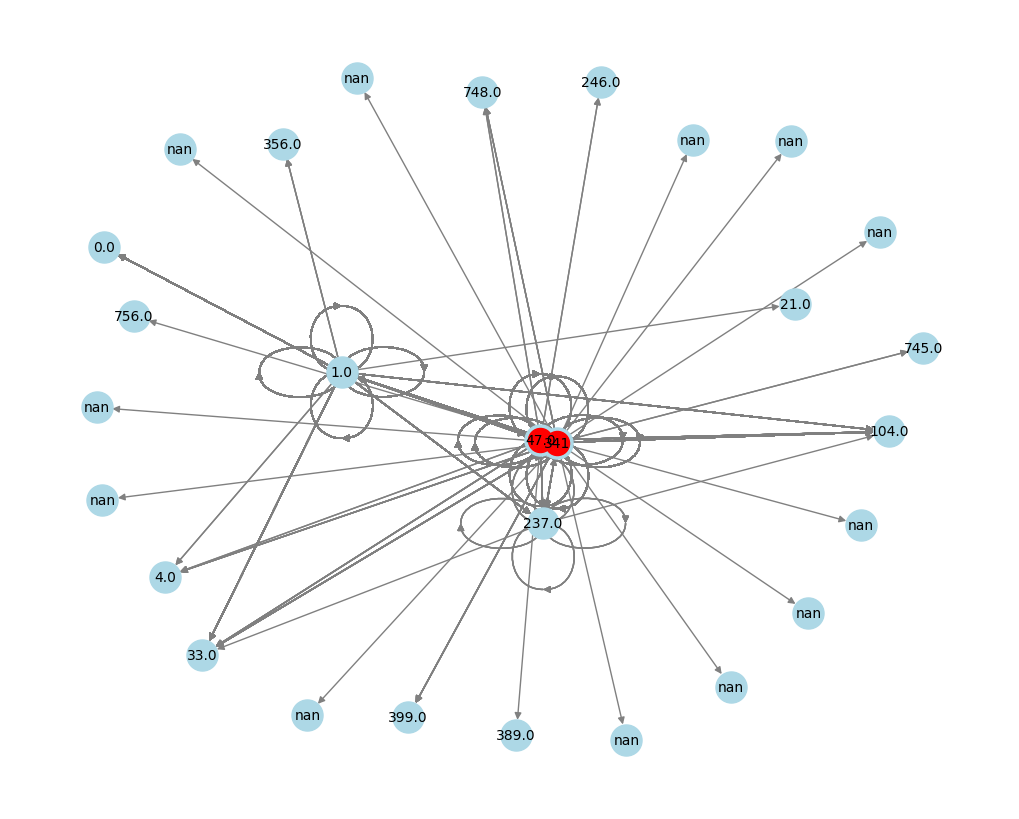

In [18]:
# Construindo o grafo das transações
G = nx.from_pandas_edgelist(dataset2, 'NUMERO_BANCO', 'NUMERO_BANCO_OD', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

print(f"Nós anômalos com base no valor total recebido: {anomalous_receivers}")

# Visualizando o grafo e destacando os nós anômalos (destinatários)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_nodes(G, pos, nodelist=anomalous_receivers, node_color='red')
plt.show()

In [53]:
# Construindo o grafo das transações
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

print(f"Nós anômalos com base no valor total recebido: {anomalous_receivers}")

# Coordenadas dos nós
pos = nx.spring_layout(G, seed=42)

# Extraindo as arestas e nós
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Configurando as arestas
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Adicionando nós e suas propriedades
node_x = []
node_y = []
node_colors = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Verificar se o nó é destinatário anômalo ou não
    if node in anomalous_receivers:
        node_colors.append('red')  # Cor para nós anômalos
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        node_colors.append('lightgreen')  # Cor para nós de origem
    else:
        node_colors.append('lightblue')  # Cor para outros nós

    node_text.append(f'Agência: {node} | Total Recebido: {total_received.get(node, 0)}')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=node_colors,
        colorbar=dict(
            thickness=15,
            title='Tipo de Nó',
            xanchor='left',
            titleside='right'
        )),
    hoverinfo='text',
    text=node_text
)

# Configuração final do gráfico
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo Interativo de Transações Financeiras',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=50),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()

Nós anômalos com base no valor total recebido: ['341.0-9295.0-183835', '104.0-2175.0-0010136006', 'nan-910.0-022888', '104.0-9999.0-999999', '1.0-3808.0-0000000072605', '341.0-1478.0-256850', '399.0-287.0-0000424188', '1.0-4775.0-0000002108100', '341.0-297.0-138729', '1.0-3463.0-0000040044', '33.0-4522.0-00000000000130022544', '1.0-5985.0-00000000005100024670', '104.0-2405.0-00000000130000038945', '21.0-85.0-99999999999999999999', '104.0-1045.0-00000000000000013498', '1.0-149.0-0000360260', '47.0-14.0-000010826341', '47.0-18.0-000010203055', '47.0-14.0-000031232556', '47.0-14.0-000031262498', '104.0-3780.0-000000000684', '341.0-14.0-000000269739', '237.0-14.0-000000259152', '47.0-34.0-000031030429']


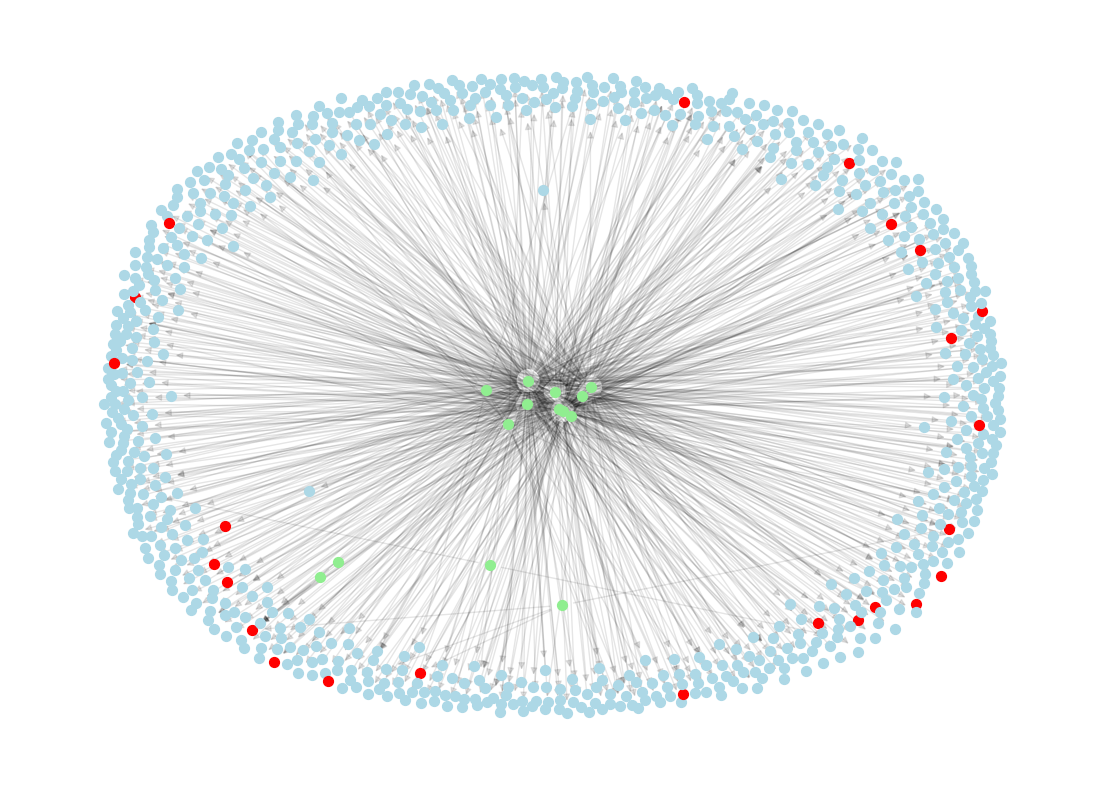

In [18]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós
for node in G.nodes():
    if node in anomalous_receivers:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=50)
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=50)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightblue', node_size=50)

# Removendo eixos para melhor visualização
plt.axis('off')

# Exibindo o gráfico
plt.show()


In [19]:


# Construindo o grafo das transações
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

print(f"Nós anômalos com base no valor total recebido: {anomalous_receivers}")

# Coordenadas dos nós usando Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Extraindo as arestas e nós
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Configurando as arestas
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Adicionando nós e suas propriedades
node_x = []
node_y = []
node_colors = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Verificar se o nó é destinatário anômalo ou não
    if node in anomalous_receivers:
        node_colors.append('red')  # Cor para nós anômalos
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        node_colors.append('lightgreen')  # Cor para nós de origem
    else:
        node_colors.append('lightblue')  # Cor para outros nós

    node_text.append(f'Agência: {node} | Total Recebido: {total_received.get(node, 0)}')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=node_colors,
        colorbar=dict(
            thickness=15,
            title='Tipo de Nó',
            xanchor='left',
            titleside='right'
        )),
    hoverinfo='text',
    text=node_text
)

# Configuração final do gráfico
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo Interativo de Transações Financeiras (Kamada-Kawai Layout)',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=50),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()


Nós anômalos com base no valor total recebido: ['341.0-9295.0-183835', '104.0-2175.0-0010136006', 'nan-910.0-022888', '104.0-9999.0-999999', '1.0-3808.0-0000000072605', '341.0-1478.0-256850', '399.0-287.0-0000424188', '1.0-4775.0-0000002108100', '341.0-297.0-138729', '1.0-3463.0-0000040044', '33.0-4522.0-00000000000130022544', '1.0-5985.0-00000000005100024670', '104.0-2405.0-00000000130000038945', '21.0-85.0-99999999999999999999', '104.0-1045.0-00000000000000013498', '1.0-149.0-0000360260', '47.0-14.0-000010826341', '47.0-18.0-000010203055', '47.0-14.0-000031232556', '47.0-14.0-000031262498', '104.0-3780.0-000000000684', '341.0-14.0-000000269739', '237.0-14.0-000000259152', '47.0-34.0-000031030429']


In [60]:

# Construindo o grafo das transações
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

print(f"Nós anômalos com base no valor total recebido: {anomalous_receivers}")

# Coordenadas dos nós usando um layout circular para melhorar a visualização
pos = nx.circular_layout(G)

# Extraindo as arestas e nós
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Configurando as arestas
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='gray'),
    hoverinfo='none',
    mode='lines')

# Adicionando nós e suas propriedades
node_x = []
node_y = []
node_colors = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Verificar se o nó é destinatário anômalo ou não
    if node in anomalous_receivers:
        node_colors.append('red')  # Cor para nós anômalos
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        node_colors.append('lightgreen')  # Cor para nós de origem
    else:
        node_colors.append('lightblue')  # Cor para outros nós

    node_text.append(f'Agência: {node} | Total Recebido: {total_received.get(node, 0)}')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='Picnic',
        size=15,
        color=node_colors,
        colorbar=dict(
            thickness=15,
            title='Tipo de Nó',
            xanchor='left',
            titleside='right'
        )),
    hoverinfo='text',
    text=node_text
)

# Configuração final do gráfico
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Transações Financeiras (Layout Circular)',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=50),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False),
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgba(0,0,0,0)'
                ))

fig.show()



Nós anômalos com base no valor total recebido: ['341.0-9295.0-183835', '104.0-2175.0-0010136006', 'nan-910.0-022888', '104.0-9999.0-999999', '1.0-3808.0-0000000072605', '341.0-1478.0-256850', '399.0-287.0-0000424188', '1.0-4775.0-0000002108100', '341.0-297.0-138729', '1.0-3463.0-0000040044', '33.0-4522.0-00000000000130022544', '1.0-5985.0-00000000005100024670', '104.0-2405.0-00000000130000038945', '21.0-85.0-99999999999999999999', '104.0-1045.0-00000000000000013498', '1.0-149.0-0000360260', '47.0-14.0-000010826341', '47.0-18.0-000010203055', '47.0-14.0-000031232556', '47.0-14.0-000031262498', '104.0-3780.0-000000000684', '341.0-14.0-000000269739', '237.0-14.0-000000259152', '47.0-34.0-000031030429']


In [62]:

# # Construindo o grafo das transações
# G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# # Calculando o valor total das transações recebidas para cada nó (destinatário)
# total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# # Calculando a média e desvio padrão das transações recebidas
# avg_received_value = np.mean(list(total_received.values()))
# std_received_value = np.std(list(total_received.values()))

# # Identificando nós anômalos com base no valor total recebido
# anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

# print(f"Nós anômalos com base no valor total recebido: {anomalous_receivers}")

# # Coordenadas dos nós em 3D usando spring_layout
# pos = nx.spring_layout(G, dim=3, seed=42)

# # Extraindo as arestas e nós
# edge_x = []
# edge_y = []
# edge_z = []
# for edge in G.edges():
#     x0, y0, z0 = pos[edge[0]]
#     x1, y1, z1 = pos[edge[1]]
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_y.append(None)
#     edge_z.append(z0)
#     edge_z.append(z1)
#     edge_z.append(None)

# # Configurando as arestas em 3D
# edge_trace = go.Scatter3d(
#     x=edge_x, y=edge_y, z=edge_z,
#     line=dict(width=2, color='gray'),
#     hoverinfo='none',
#     mode='lines')

# # Adicionando nós e suas propriedades em 3D
# node_x = []
# node_y = []
# node_z = []
# node_colors = []
# node_text = []

# for node in G.nodes():
#     x, y, z = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     node_z.append(z)
    
#     # Verificar se o nó é destinatário anômalo ou não
#     if node in anomalous_receivers:
#         node_colors.append('red')  # Cor para nós anômalos
#     elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
#         node_colors.append('lightgreen')  # Cor para nós de origem
#     else:
#         node_colors.append('lightblue')  # Cor para outros nós

#     node_text.append(f'Agência: {node} | Total Recebido: {total_received.get(node, 0)}')

# node_trace = go.Scatter3d(
#     x=node_x, y=node_y, z=node_z,
#     mode='markers',
#     marker=dict(
#         size=10,
#         color=node_colors,
#         opacity=0.8,
#     ),
#     hoverinfo='text',
#     text=node_text
# )

# # Configuração final do gráfico 3D
# fig = go.Figure(data=[edge_trace, node_trace],
#                 layout=go.Layout(
#                     title='Grafo 3D de Transações Financeiras',
#                     titlefont_size=16,
#                     showlegend=False,
#                     margin=dict(b=0, l=0, r=0, t=50),
#                     scene=dict(
#                         xaxis=dict(showbackground=False),
#                         yaxis=dict(showbackground=False),
#                         zaxis=dict(showbackground=False)
#                     )
#                 ))

# fig.show()


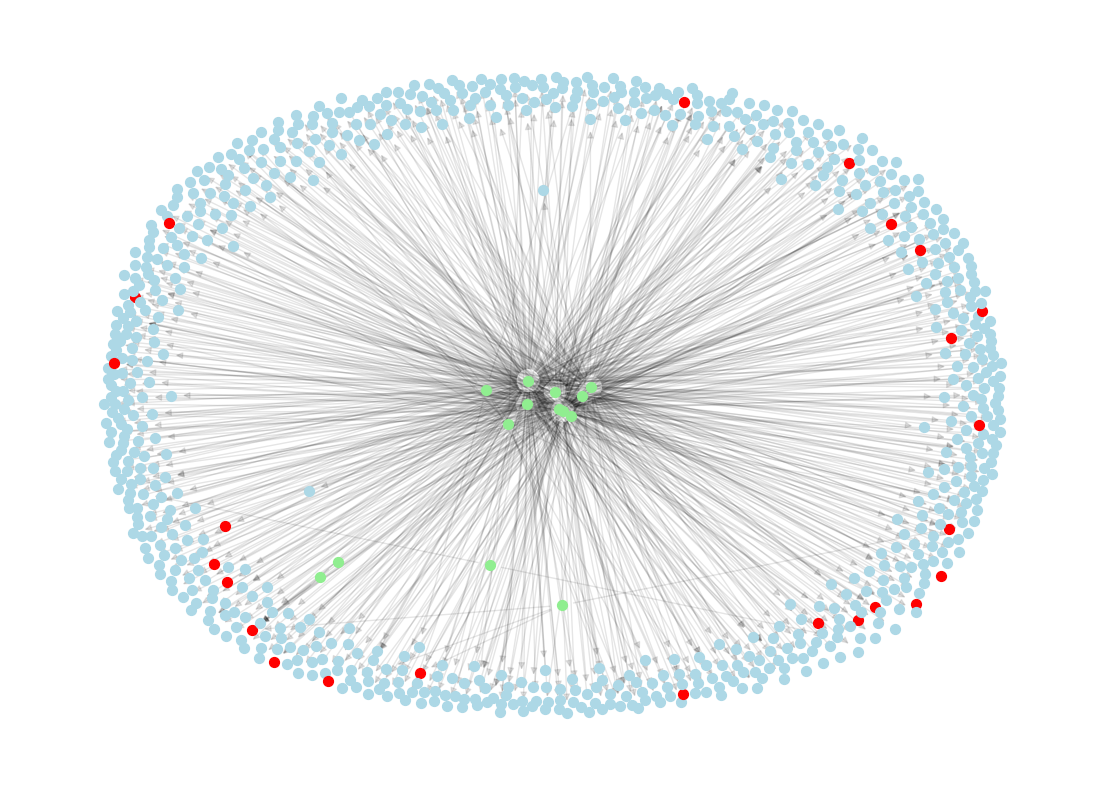

In [16]:
# Criando o grafo a partir dos dados
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós
for node in G.nodes():
    if node in anomalous_receivers:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=50)
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=50)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightblue', node_size=50)

# Removendo eixos para melhor visualização
plt.axis('off')

# Exibindo o gráfico
plt.show()


In [56]:
dataset2.loc[(dataset2['NOME_TITULAR']=='GIRASSOL'), "NOME_TITULAR_2"] = 'INVESTIGADO_1'
dataset2.loc[(dataset2['NOME_TITULAR']=='MEVIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_2'
dataset2.loc[(dataset2['NOME_TITULAR']=='MEVIO FILHO'), "NOME_TITULAR_2"] = 'INVESTIGADO_3'
dataset2.loc[(dataset2['NOME_TITULAR']=='TÍCIO'), "NOME_TITULAR_2"] = 'INVESTIGADO_4'

C:\Users\User\AppData\Local\Temp\ipykernel_8216\2862351131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
dataset2.NOME_TITULAR_2.value_counts()

NOME_TITULAR_2
INVESTIGADO_3    4053
INVESTIGADO_2    2854
INVESTIGADO_1    1397
INVESTIGADO_4    1018
Name: count, dtype: int64

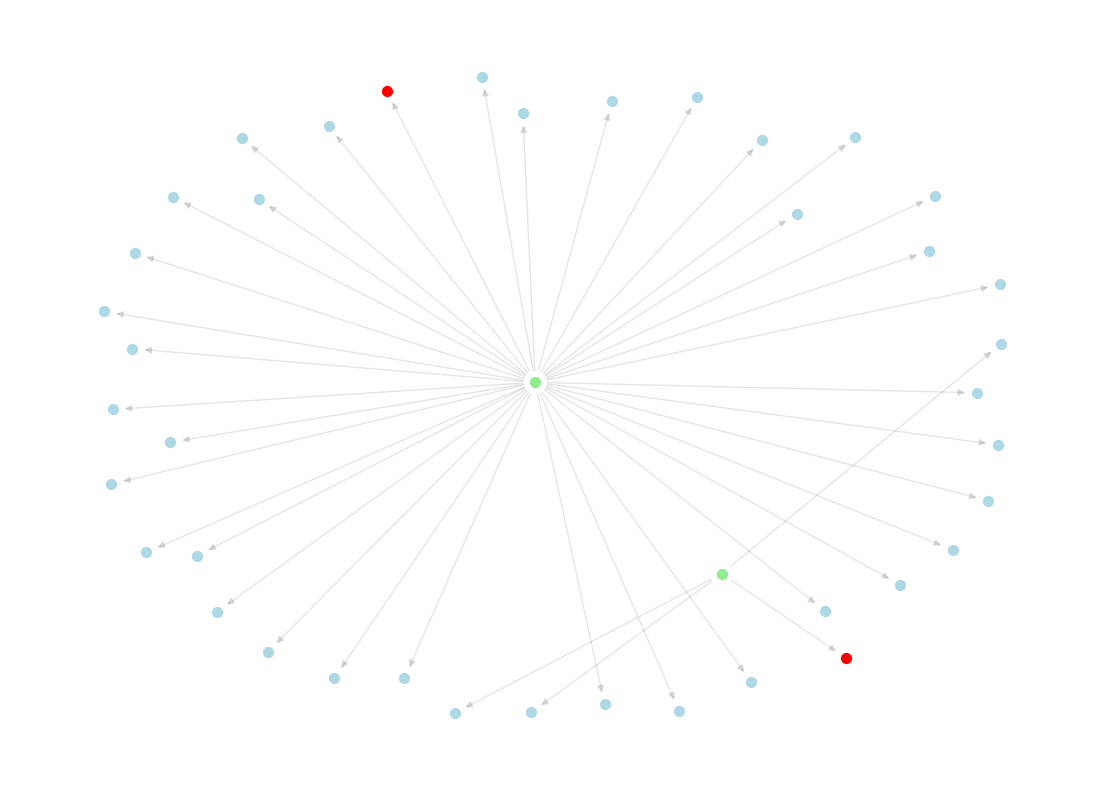

In [30]:
# Criando o grafo a partir dos dados
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_4'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Calculando o valor total das transações recebidas para cada nó (destinatário)
total_received = dict(G.in_degree(weight='VALOR_TRANSACAO'))

# Calculando a média e desvio padrão das transações recebidas
avg_received_value = np.mean(list(total_received.values()))
std_received_value = np.std(list(total_received.values()))

# Identificando nós anômalos com base no valor total recebido
anomalous_receivers = [node for node, total in total_received.items() if total > avg_received_value + 2 * std_received_value]

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós
for node in G.nodes():
    if node in anomalous_receivers:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=50)
    elif any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=50)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightblue', node_size=50)

# Removendo eixos para melhor visualização
plt.axis('off')

# Exibindo o gráfico
plt.show()

## Métricas

In [35]:
# Centralidade dos Nós
# A centralidade mede a importância de um nó dentro do grafo. Usuários com alta centralidade podem ter um papel crucial na rede de transações (como hubs financeiros) e comportamentos incomuns desses nós podem indicar anomalias. Há diferentes tipos de centralidade que podem ser usadas:

# Centralidade de Grau (Degree Centrality): Número de conexões diretas de um nó. Um usuário com muitas transações pode ser suspeito de atividades fraudulentas.
# Centralidade de Intermediação (Betweenness Centrality): Mede quantas vezes um nó aparece no caminho mais curto entre outros nós. Se um usuário está agindo como um intermediário para muitas transações, ele pode estar facilitando transações suspeitas.
# Centralidade de Proximidade (Closeness Centrality): Mede a proximidade de um nó a todos os outros nós na rede. Usuários muito conectados podem representar atores-chav


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


Nós com alta centralidade de intermediação: []
Nós com alta centralidade de grau: ['47-BB-000010H87560']
Nós com alta centralidade de proximidade: []


In [39]:
 [centrality for node, centrality in degree_centrality.items() if centrality > 0.1]

[0.8780487804878049]

In [40]:
# Clusterização de Nós
# A clusterização de nós no grafo pode revelar comunidades de usuários que transacionam frequentemente entre si. Comportamentos incomuns dentro de um cluster, como a presença de muitos novos usuários ou transações entre usuários que não faziam parte daquele cluster, podem ser um sinal de fraude.


# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='amount', seed=42)
print(f"Comunidades detectadas: {communities}")


Comunidades detectadas: [{'47.0-29.0-000010204642', '47.0-14.0-000031232661', '47.0-14.0-000010391523', '47.0-34.0-000010284510', '47.0-14.0-000010440834', '47.0-47.0-000010111103', '47.0-14.0-000031300101', '47.0-14.0-000010452930', '47.0-28.0-000031031226', '47.0-14.0-000010584224', '47.0-29.0-000010496082', '47.0-14.0-000010082865', '47.0-35.0-000010257872', '47.0-51.0-000010315572', '47.0-35.0-000010311257', '47.0-58.0-000010098242', '47.0-34.0-000010287560', '47.0-18.0-000010203055', '47.0-43.0-000010218444', '47.0-58.0-000010000765', '47.0-14.0-000031262498', '47.0-49.0-000010016425', '47.0-43.0-000010017309', '47-BB-000010H87560', '47.0-63.0-000010012441', '47.0-55.0-000010054291', '47.0-34.0-000010347415', '47.0-14.0-000010451674', '47.0-15.0-000010380688', '47.0-14.0-000010620000', '47.0-14.0-000010615448', '47.0-14.0-000031232556', '47.0-14.0-000010826341', '47.0-43.0-000010255420', '47.0-43.0-000010331739', '47.0-14.0-000223012945', '47.0-29.0-000010389316'}, {'104.0-2175.0-

In [41]:
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Agrupando comunidades pequenas
threshold = 15 # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

print(f"Comunidades filtradas: {filtered_communities}")

Comunidades filtradas: [{'47.0-29.0-000010204642', '47.0-14.0-000031232661', '47.0-14.0-000010391523', '47.0-34.0-000010284510', '47.0-14.0-000010440834', '47.0-47.0-000010111103', '47.0-14.0-000031300101', '47.0-14.0-000010452930', '47.0-28.0-000031031226', '47.0-14.0-000010584224', '47.0-29.0-000010496082', '47.0-14.0-000010082865', '47.0-35.0-000010257872', '47.0-51.0-000010315572', '47.0-35.0-000010311257', '47.0-58.0-000010098242', '47.0-34.0-000010287560', '47.0-18.0-000010203055', '47.0-43.0-000010218444', '47.0-58.0-000010000765', '47.0-14.0-000031262498', '47.0-49.0-000010016425', '47.0-43.0-000010017309', '47-BB-000010H87560', '47.0-63.0-000010012441', '47.0-55.0-000010054291', '47.0-34.0-000010347415', '47.0-14.0-000010451674', '47.0-15.0-000010380688', '47.0-14.0-000010620000', '47.0-14.0-000010615448', '47.0-14.0-000031232556', '47.0-14.0-000010826341', '47.0-43.0-000010255420', '47.0-43.0-000010331739', '47.0-14.0-000223012945', '47.0-29.0-000010389316'}]


In [42]:
len(filtered_communities)

1

C:\Users\User\AppData\Local\Temp\ipykernel_3276\4012136369.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


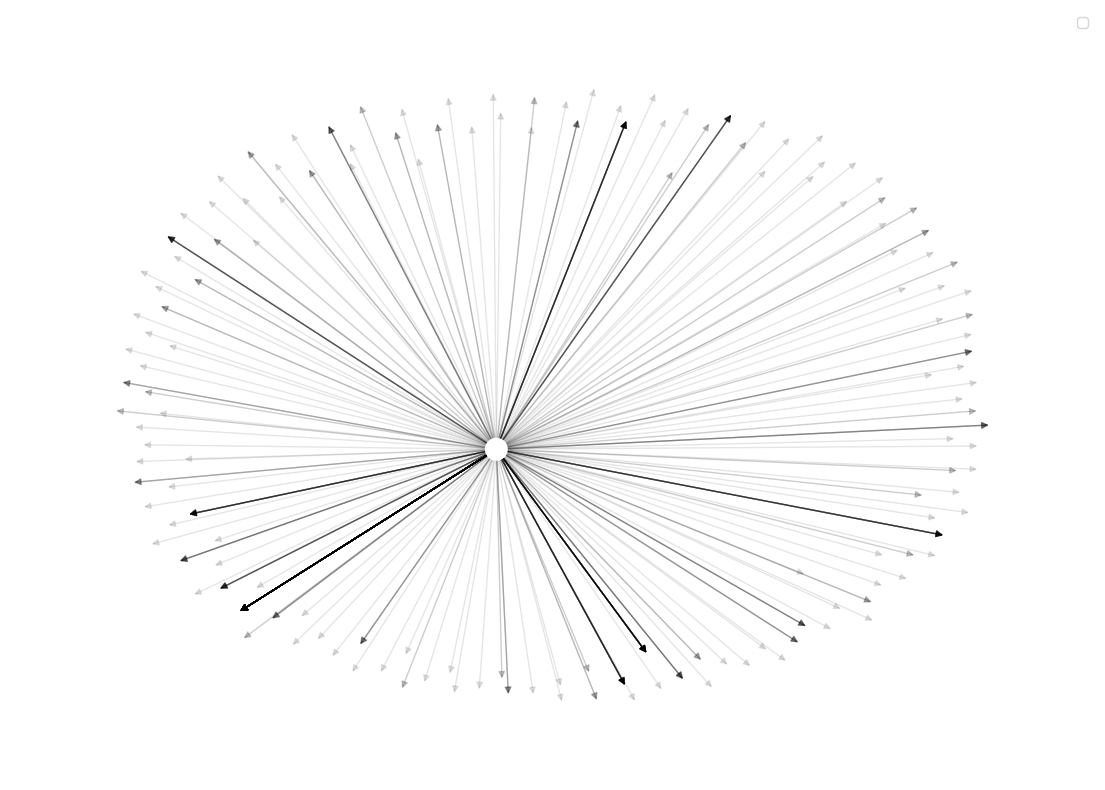

Comunidades filtradas: []
Nós com alta centralidade de intermediação: []
Nós com alta centralidade de grau: ['47-AA-000031H3H661']
Nós com alta centralidade de proximidade: []
[1.0]
Ciclos detectados: []


In [114]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_1'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    plt.scatter(pos[node][0], pos[node][1], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    plt.scatter([], [], color=colors(i), label=f'Community {i+1}')

plt.legend()
# plt.title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas)')
plt.axis('off')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")

G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_1'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


print([centrality for node, centrality in degree_centrality.items() if centrality > 0.1])

cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")


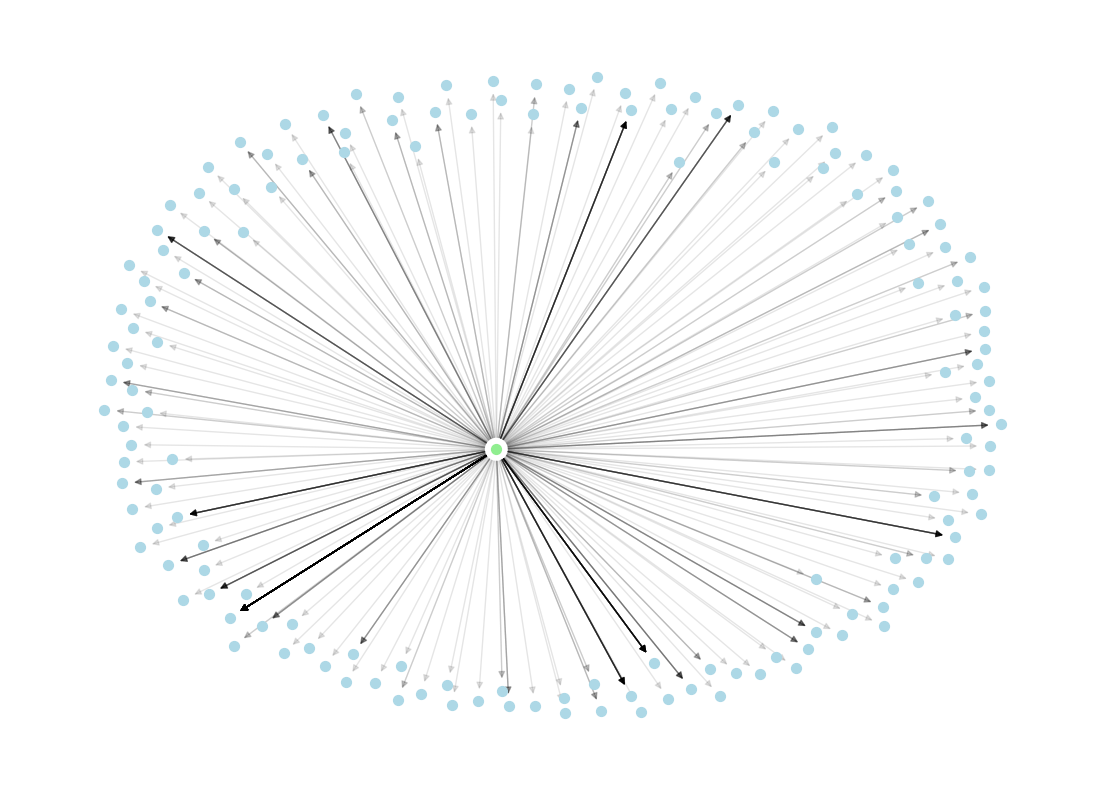

In [20]:
# Criando o grafo a partir dos dados
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_1'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())


# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós
for node in G.nodes():
    if any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=50)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightblue', node_size=50)

# Removendo eixos para melhor visualização
plt.axis('off')

# Exibindo o gráfico
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3276\1260284636.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


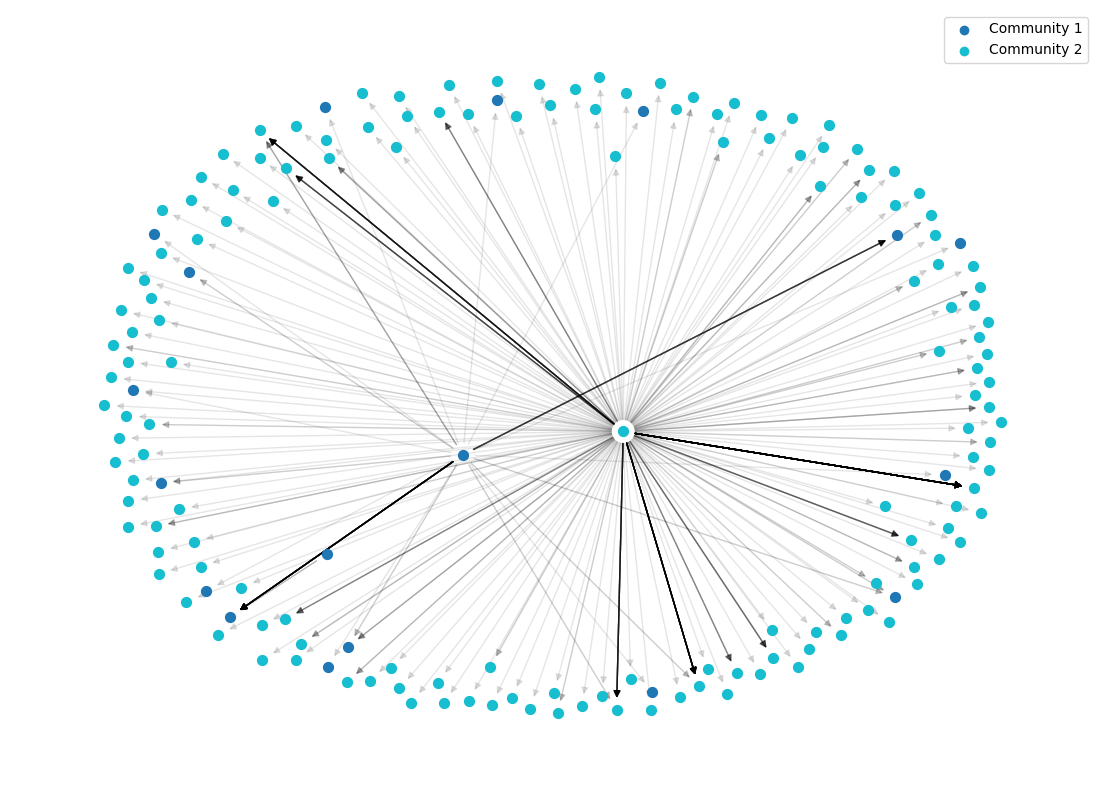

Comunidades filtradas: [{'1.0-3088.0-0000096997', '341-9H95-114418', '341.0-1135.0-227708', '104.0-2448.0-0030017031', 'nan-59.0-3000059591', '104.0-59.0-3000059591', '341.0-7702.0-011722', '341.0-646.0-745232', '237.0-2628.0-0107100078', '341.0-9295.0-183835', '104.0-2186.0-0010023457', '104.0-2448.0-3000008512', '341.0-1170.0-006256', '341-9H95-364146', '1.0-1224.0-4100197602', '341.0-1170.0-602591', '341.0-9295.0-330980', '237.0-2052.0-0100063037'}, {'1.0-4775.0-0002108100', '1.0-1717.0-0000013454', '237.0-2628.0-0100043435', '4.0-5.0-0000182759', '341.0-9690.0-007423', '1.0-1402.0-3900236474', '341.0-6372.0-004710', '341.0-9295.0-364807', '1.0-3546.0-0500369268', '341.0-1478.0-256850', '104.0-1500.0-3000023391', '1.0-2346.0-7800378771', '1.0-1402.0-0000025747', '341.0-297.0-004020', 'nan-910.0-022888', '341.0-297.0-000937', '756.0-3003.0-0000221627', '237.0-1438.0-0000286303', '1.0-4775.0-5400095869', '104.0-59.0-0030027029', '341.0-8124.0-189013', '1.0-2971.0-4000066699', '237.0-1

In [113]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_2'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    plt.scatter(pos[node][0], pos[node][1], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    plt.scatter([], [], color=colors(i), label=f'Community {i+1}')

plt.legend()
# plt.title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas)')
plt.axis('off')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")

G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_2'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


print([centrality for node, centrality in degree_centrality.items() if centrality > 0.1])

cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")

C:\Users\User\AppData\Local\Temp\ipykernel_3276\1278756006.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


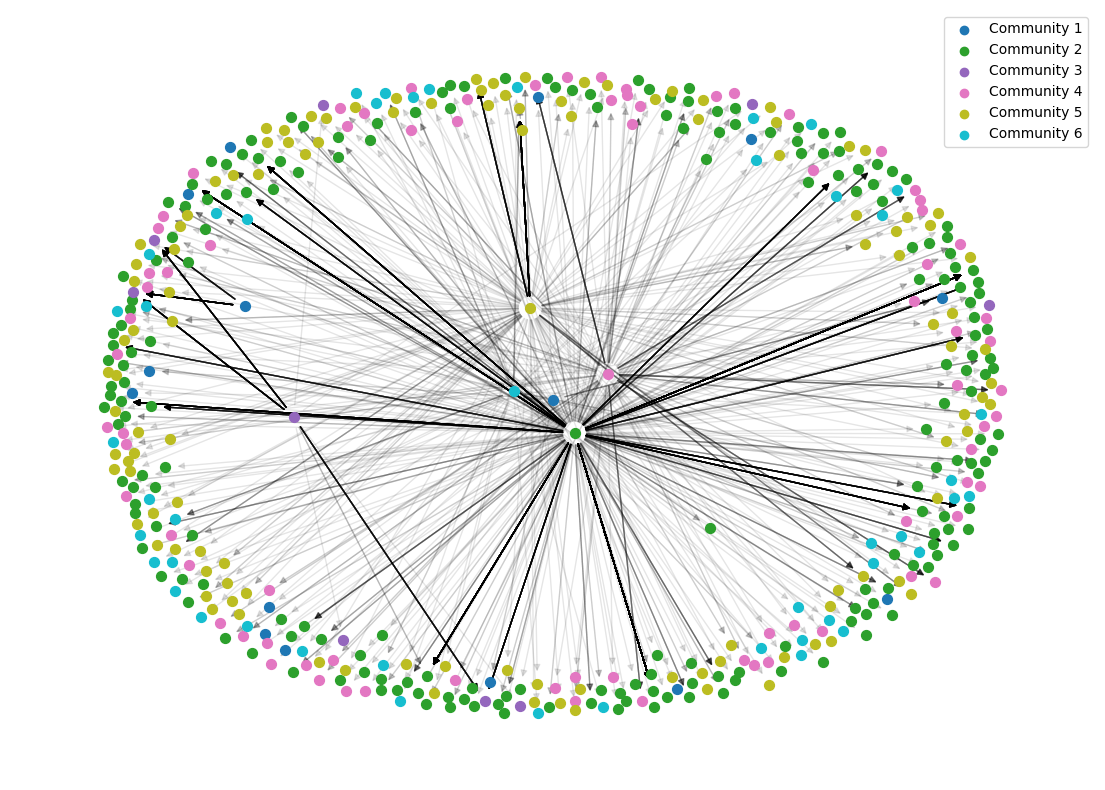

Comunidades filtradas: [{'104.0-281.0-10307596', '237.0-3162.0-2439336', '341.0-6398.0-8124000734', '341.0-705.0-3157446466', '237.0-3062.0-5420776', '237.0-3592.0-24651', '33.0-1593.0-4813000398', '237.0-1294.0-937126', '237.0-3490.0-24180', '237.0-2452.0-110264', '237.0-3646.0-155381', '237.0-3162.0-2645688', '237.0-3231.0-839973', '237-3F6H-100X5344'}, {'1.0-1762.0-00000000000000085154', '1.0-2961.0-00000000000000149985', '1.0-2344.0-00000000000000174009', '1.0-3546.0-00000000000000369268', '33.0-4522.0-00000000000130022544', '1.0-4775.0-00000000000000239380', '1.0-1402.0-00000000005100235477', '1.0-3459.0-00000000000000111724', '1.0-2961.0-00000000005100191364', '341.0-1170.0-00000000017099017261', '1.0-1124.0-00000000005100103058', '1.0-4775.0-00000000000000019739', '104.0-2186.0-00000000013000315621', '1.0-3070.0-00000000000000047821', '1.0-2178.0-00000000000000194034', '104.0-2186.0-00000000013000622419', '1.0-3287.0-00000000000000203920', '104.0-59.0-00000000030000027029', '1.0

In [112]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_3'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2 # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    plt.scatter(pos[node][0], pos[node][1], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    plt.scatter([], [], color=colors(i), label=f'Community {i+1}')

plt.legend()
# plt.title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas)')
plt.axis('off')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")

G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_3'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


print([centrality for node, centrality in degree_centrality.items() if centrality > 0.1])

cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")

C:\Users\User\AppData\Local\Temp\ipykernel_3276\2772437053.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


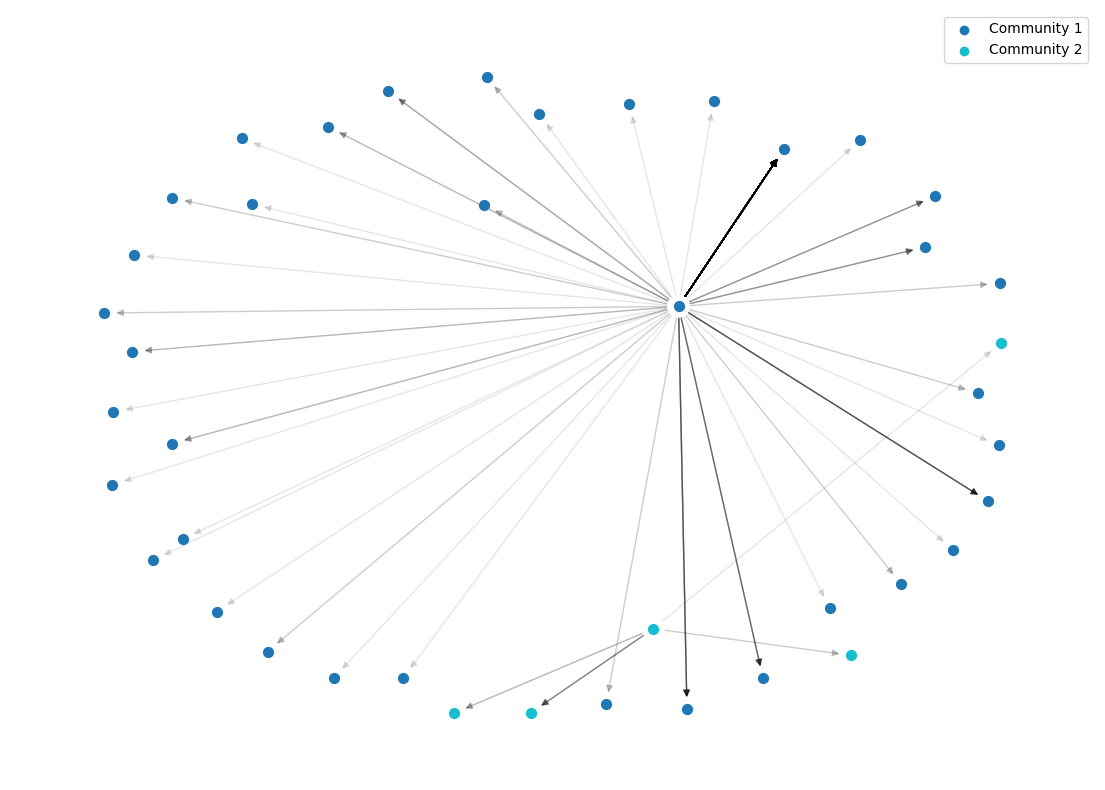

Comunidades filtradas: [{'47.0-35.0-000010311257', '47.0-43.0-000010218444', '47.0-34.0-000010284510', '47.0-34.0-000010347415', '47.0-14.0-000010082865', '47.0-63.0-000010012441', '47.0-14.0-000223012945', '47.0-58.0-000010098242', '47.0-14.0-000010451674', '47.0-43.0-000010331739', '47.0-58.0-000010000765', '47.0-29.0-000010204642', '47.0-14.0-000010440834', '47.0-14.0-000010615448', '47.0-43.0-000010017309', '47.0-55.0-000010054291', '47.0-14.0-000031232556', '47.0-51.0-000010315572', '47.0-18.0-000010203055', '47.0-43.0-000010255420', '47.0-28.0-000031031226', '47.0-14.0-000010584224', '47.0-14.0-000010826341', '47.0-14.0-000010391523', '47.0-14.0-000010620000', '47.0-14.0-000010452930', '47.0-35.0-000010257872', '47.0-47.0-000010111103', '47.0-29.0-000010389316', '47.0-15.0-000010380688', '47.0-14.0-000031262498', '47.0-14.0-000031232661', '47.0-29.0-000010496082', '47.0-49.0-000010016425', '47.0-14.0-000031300101', '47-BB-000010H87560', '47.0-34.0-000010287560'}, {'341-9H95-36X75

In [110]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_4'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    plt.scatter(pos[node][0], pos[node][1], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    plt.scatter([], [], color=colors(i), label=f'Community {i+1}')

plt.legend()
# plt.title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas)')
plt.axis('off')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")


G = nx.from_pandas_edgelist(dataset2[dataset2['NOME_TITULAR_2']=='INVESTIGADO_4'], 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


print([centrality for node, centrality in degree_centrality.items() if centrality > 0.1])

cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")

C:\Users\User\AppData\Local\Temp\ipykernel_3276\906508091.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


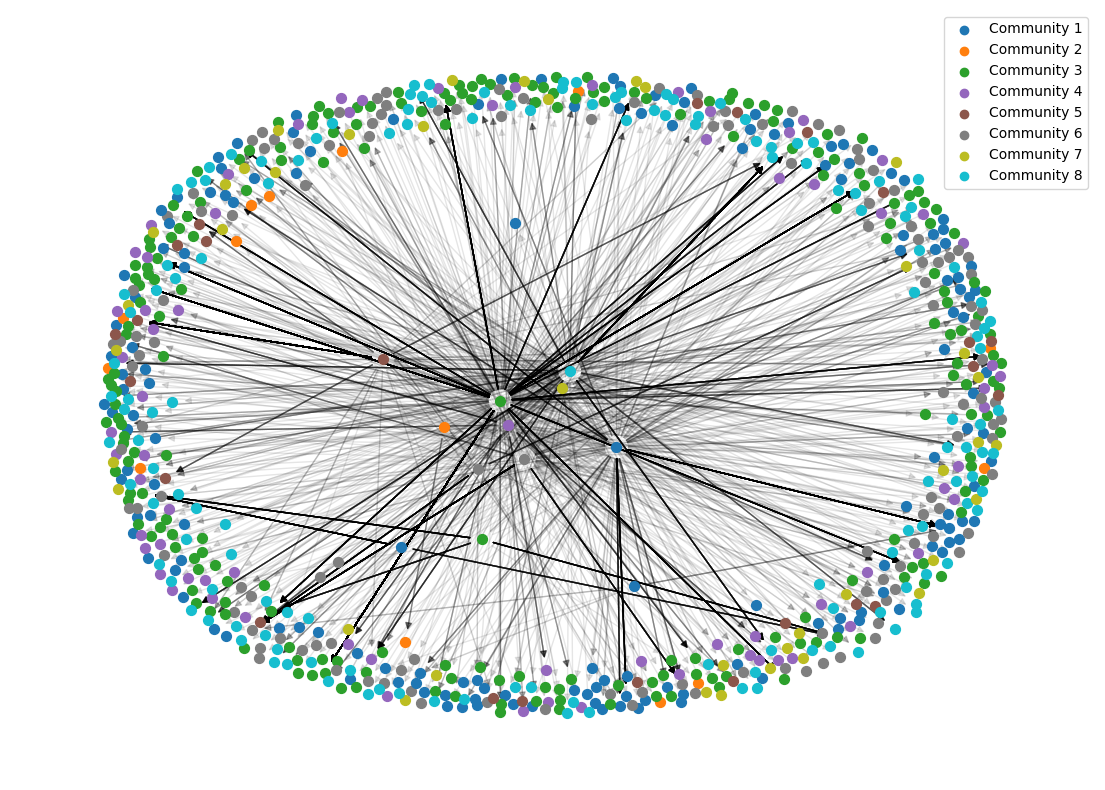

Comunidades filtradas: [{'1.0-4775.0-0002108100', '1.0-1717.0-0000013454', '237.0-2628.0-0100043435', '4.0-5.0-0000182759', '341.0-9690.0-007423', '1.0-1402.0-3900236474', '341.0-6372.0-004710', '341.0-9295.0-364807', '1.0-3546.0-0500369268', '104.0-1500.0-3000023391', '341.0-1478.0-256850', '1.0-2346.0-7800378771', '1.0-1402.0-0000025747', '341.0-297.0-004020', 'nan-910.0-022888', '341.0-297.0-000937', '756.0-3003.0-0000221627', '237.0-1438.0-0000286303', '1.0-4775.0-5400095869', '104.0-59.0-0030027029', '341.0-8124.0-189013', '1.0-2971.0-4000066699', '237.0-1438.0-0100026832', '1.0-2961.0-3801088408', '104.0-2382.0-3000315422', '1.0-3361.0-8800165867', '237.0-2798.0-0000430595', '104.0-9999.0-999999', '237.0-2628.0-0100262005', '341.0-443.0-208236', '341.0-5634.0-173727', '1.0-3429.0-0000013481', '1.0-3808.0-0000072605', '104.0-2175.0-3000051233', '237.0-3043.0-0100651133', '104.0-3570.0-0030000283', '104.0-1435.0-1000225238', '1.0-2971.0-7400066699', '33.0-3026.0-1501804640', '33.0-

In [24]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    plt.scatter(pos[node][0], pos[node][1], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    plt.scatter([], [], color=colors(i), label=f'Community {i+1}')

plt.legend()
# plt.title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas)')
plt.axis('off')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")


degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Detectando nós com alta centralidade de intermediação
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de intermediação: {high_betweenness_nodes}")

# Detectando nós com alta centralidade de intermediação
high_degree_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de grau: {high_degree_centrality_nodes}")

# Detectando nós com alta centralidade de intermediação
high_closeness_centrality_nodes = [node for node, centrality in closeness_centrality.items() if centrality > 0.1]
print(f"Nós com alta centralidade de proximidade: {high_closeness_centrality_nodes}")


print([centrality for node, centrality in degree_centrality.items() if centrality > 0.1])

cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")

C:\Users\User\AppData\Local\Temp\ipykernel_15312\275410219.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


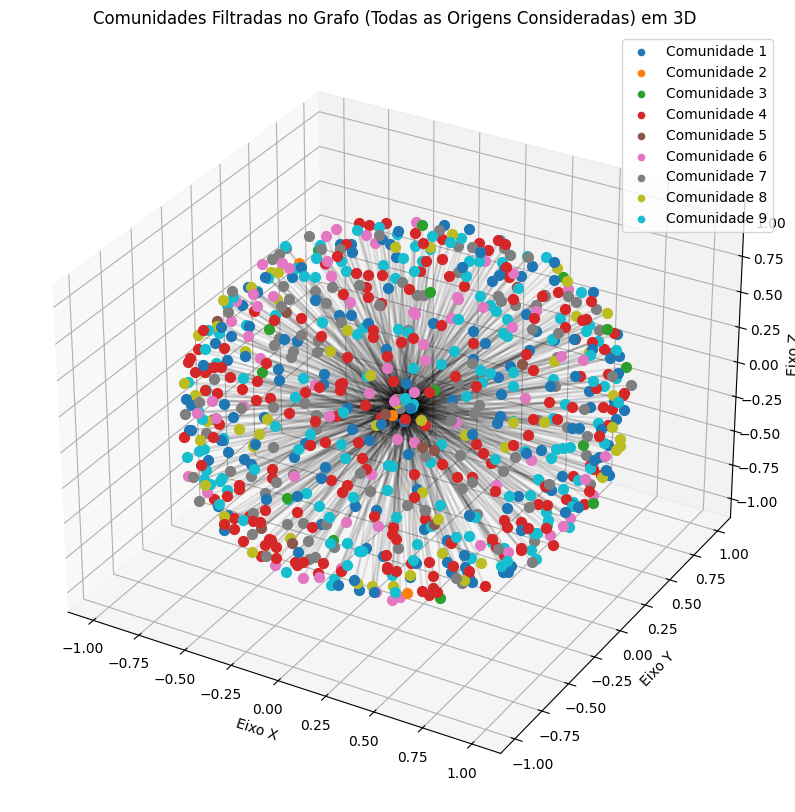

Comunidades filtradas: [{'33.0-4589.0-0010317680', '1.0-2346.0-7800378771', '104.0-2081.0-30000000789', '341.0-6483.0-266398', '748.0-2102.0-0000205915', '1.0-3088.0-0000029452', '1.0-4249.0-2200125270', '341.0-9295.0-105507', '341.0-2760.0-047205', '341.0-443.0-208236', 'nan-3780.0-3000002474', '341.0-9364.0-087008', '1.0-4775.0-0000002108100', '1.0-3287.0-0000232696', '1.0-2971.0-9500066699', '1.0-1402.0-0000235474', '33.0-1061.0-0010008340', '1.0-3808.0-0000072605', '341.0-5634.0-173727', '104.0-3570.0-0030000283', '1.0-4775.0-5400095869', '33.0-4505.0-0130006550', '237.0-3490.0-0000015431', '341.0-9364.0-113796', '237.0-3043.0-0100651133', '4.0-5.0-3005021679', '341.0-2905.0-184012', '1.0-4775.0-0002108100', '237.0-2798.0-0000430595', '1.0-2971.0-4000066699', '1.0-1224.0-0000043558', '104.0-59.0-0030027029', '237.0-1438.0-0100185299', '1.0-2971.0-5400066699', '1.0-285.0-0000160377', '399.0-167.0-0167235036', '1.0-2961.0-5100683388', '104.0-3618.0-13000005495', '47.0-61.0-41518', '3

In [28]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout 3D para a organização dos nós
pos = nx.spring_layout(G, seed=42, dim=3)  # Usar 3D para o layout

# Plotando o grafo em 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Desenhando as arestas
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    z = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x, y, z, color='black', alpha=0.1)

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
for i, comm in enumerate(filtered_communities):
    ax.scatter([], [], [], color=colors(i), label=f'Comunidade {i+1}')

ax.legend()
ax.set_title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas) em 3D')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")

C:\Users\User\AppData\Local\Temp\ipykernel_15312\1532114622.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades


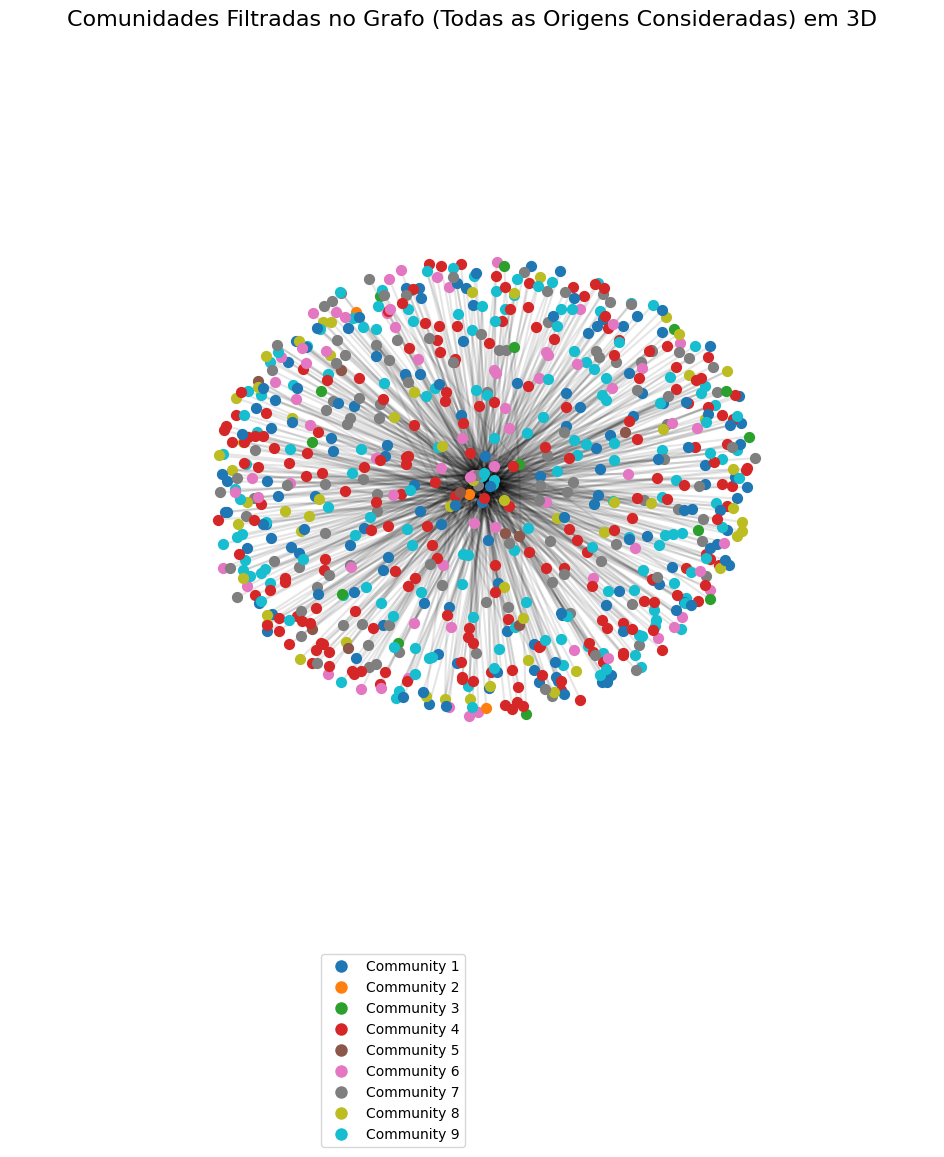

Comunidades filtradas: [{'33.0-4589.0-0010317680', '1.0-2346.0-7800378771', '104.0-2081.0-30000000789', '341.0-6483.0-266398', '748.0-2102.0-0000205915', '1.0-3088.0-0000029452', '1.0-4249.0-2200125270', '341.0-9295.0-105507', '341.0-2760.0-047205', '341.0-443.0-208236', 'nan-3780.0-3000002474', '341.0-9364.0-087008', '1.0-4775.0-0000002108100', '1.0-3287.0-0000232696', '1.0-2971.0-9500066699', '1.0-1402.0-0000235474', '33.0-1061.0-0010008340', '1.0-3808.0-0000072605', '341.0-5634.0-173727', '104.0-3570.0-0030000283', '1.0-4775.0-5400095869', '33.0-4505.0-0130006550', '237.0-3490.0-0000015431', '341.0-9364.0-113796', '237.0-3043.0-0100651133', '4.0-5.0-3005021679', '341.0-2905.0-184012', '1.0-4775.0-0002108100', '237.0-2798.0-0000430595', '1.0-2971.0-4000066699', '1.0-1224.0-0000043558', '104.0-59.0-0030027029', '237.0-1438.0-0100185299', '1.0-2971.0-5400066699', '1.0-285.0-0000160377', '399.0-167.0-0167235036', '1.0-2961.0-5100683388', '104.0-3618.0-13000005495', '47.0-61.0-41518', '3

In [29]:
# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Detectando comunidades usando o método de Louvain
communities = community.louvain_communities(G, weight='VALOR_TRANSACAO', seed=42)

# Definindo um limiar para filtrar comunidades pequenas
threshold = 2  # Tamanho mínimo da comunidade
filtered_communities = [comm for comm in communities if len(comm) >= threshold]

# Criando um dicionário que mapeia cada nó à sua comunidade filtrada
community_map = {}
for i, comm in enumerate(filtered_communities):
    for node in comm:
        community_map[node] = i

# Layout 3D para a organização dos nós
pos = nx.spring_layout(G, seed=42, dim=3)  # Usar 3D para o layout

# Plotando o grafo em 3D
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Desenhando as arestas
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    z = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x, y, z, color='black', alpha=0.1)

# Desenhando os nós com cores diferentes para cada comunidade filtrada
colors = plt.cm.get_cmap('tab10', len(filtered_communities))  # Cores para diferentes comunidades
for node in G.nodes():
    ax.scatter(pos[node][0], pos[node][1], pos[node][2], color=colors(community_map.get(node, -1)), s=50)

# Adicionando legenda para comunidades filtradas
legend_elements = []
for i, comm in enumerate(filtered_communities):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i+1}', markerfacecolor=colors(i), markersize=10))

# Adicionando a legenda com nova posição
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(0.5, -0.1), fontsize='medium')

# Removendo eixos para melhor visualização
ax.set_axis_off()

# Título do gráfico
ax.set_title('Comunidades Filtradas no Grafo (Todas as Origens Consideradas) em 3D', fontsize=16)

# Exibindo o gráfico
plt.show()

# Exibindo as comunidades filtradas detectadas
print(f"Comunidades filtradas: {filtered_communities}")

In [67]:
# Cadeias de Transações
# Você pode verificar cadeias de transações para ver como o dinheiro flui entre múltiplos usuários. Se houver muitas transações consecutivas entre diferentes contas, pode ser um indicativo de lavagem de dinheiro ou atividades suspeitas.

# Verificando o caminho mais longo entre dois nós (transações em cadeia)
longest_path = nx.dag_longest_path(G)
print(f"Caminho mais longo no grafo de transações: {longest_path}")


Caminho mais longo no grafo de transações: ['341-9H95-114418', '341.0-646.0-745232']


In [68]:
# Análise de Densidade
# A densidade do grafo mede o número de arestas em relação ao número de nós. Um aumento súbito na densidade do grafo pode indicar um fluxo atípico de transações entre muitos usuários, o que pode ser suspeito

density = nx.density(G)
print(f"Densidade do grafo: {density}")


Densidade do grafo: 0.0013592041761055845


In [69]:
# Análise de Ciclos
# Em grafos dirigidos, ciclos podem representar lavagem de dinheiro ou fraudes complexas, onde o dinheiro acaba voltando para o ponto inicial após passar por várias contas intermediárias.

# Detectando ciclos no grafo
cycles = list(nx.simple_cycles(G))
print(f"Ciclos detectados: {cycles}")


Ciclos detectados: []


## Anomaly Detection

In [25]:
dataset2['VALOR_TRANSACAO'] = dataset2['VALOR_TRANSACAO'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_3276\411360123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['VALOR_TRANSACAO'] = dataset2['VALOR_TRANSACAO'].astype(float)


In [26]:
# dataset2 = dataset2.reset_index()
# dataset2 = dataset2.rename(columns={"index": 'chave'})
# dataset2.head()

In [27]:
# Construindo o grafo das transações
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.MultiDiGraph())

# Calculando características para cada nó (conta)
dataset = list()

for node in G.nodes():
    # Transações enviadas (Outdegree)
    out_edges = G.out_edges(node, data=True)
    # print(out_edges)
    total_enviado = sum([data['VALOR_TRANSACAO'] for _, _, data in out_edges])
    num_transacoes_enviadas = len(out_edges)
    media_valor_enviado = np.mean([data['VALOR_TRANSACAO'] for _, _, data in out_edges]) if num_transacoes_enviadas > 0 else 0
    desvio_padrao_enviado = np.std([data['VALOR_TRANSACAO'] for _, _, data in out_edges]) if num_transacoes_enviadas > 0 else 0
    
    # Transações recebidas (Indegree)
    in_edges = G.in_edges(node, data=True)
    # print(in_edges)
    total_recebido = sum([data['VALOR_TRANSACAO'] for _, _, data in in_edges])
    num_transacoes_recebidas = len(in_edges)
    media_valor_recebido = np.mean([data['VALOR_TRANSACAO'] for _, _, data in in_edges]) if num_transacoes_recebidas > 0 else 0
    desvio_padrao_recebido = np.std([data['VALOR_TRANSACAO'] for _, _, data in in_edges]) if num_transacoes_recebidas > 0 else 0

    # Número de vizinhos (Outdegree e Indegree)
    outdegree = G.out_degree(node)
    indegree = G.in_degree(node)

    # # Taxa de variação entre enviado e recebido
    # taxa_variacao = total_enviado / total_recebido if total_recebido > 0 else 0

    # Adicionando ao dataset
    dataset.append({
    'account_number': node,
    'total_value_sent': total_enviado,
    'total_value_received': total_recebido,
    'num_transactions_sent': num_transacoes_enviadas,
    'num_transactions_received': num_transacoes_recebidas,
    'average_value_sent': media_valor_enviado,
    'average_value_received': media_valor_recebido,
    'std_dev_sent': desvio_padrao_enviado,
    'std_dev_received': desvio_padrao_recebido,
    'outdegree': outdegree,
    'indegree': indegree,
    # 'variation_rate': taxa_variacao
        })

# Convertendo para DataFrame
df_dataset = pd.DataFrame(dataset)

In [28]:
df_dataset 

account_number  total_value_sent  total_value_received  \
0            341-9H95-114418          187920.0                   0.0   
1         341.0-646.0-745232               0.0                2023.0   
2        341.0-9295.0-183835               0.0              768251.0   
3    104.0-2448.0-3000008512               0.0                 250.0   
4    237.0-2628.0-0107100078               0.0                 400.0   
..                       ...               ...                   ...   
776   47.0-47.0-000010111103               0.0                 200.0   
777   47.0-29.0-000010496082               0.0                1999.0   
778   47.0-43.0-000010017309               0.0                 788.0   
779          341-9H95-36X756           62003.0                   0.0   
780  237.0-1438.0-6540100323               0.0                 200.0   

     num_transactions_sent  num_transactions_received  average_value_sent  \
0                       84                          0         2237.142857   
1                        0                         14            0.000000   
2                        0                        148            0.000000   
3                        0                          1            0.000000   
4                        0                          1            0.000000   
..                     ...                        ...                 ...   
776                      0                          1            0.000000   
777                      0                          3            0.000000   
778                      0                          1            0.000000   
779                     12                          0         5166.916667   
780                      0                          1            0.000000   

     average_value_received  std_dev_sent  std_dev_received  outdegree  \
0                  0.000000   2862.278089          0.000000         84   
1                144.500000      0.000000        172.988749          0   
2               5190.885135      0.000000       7033.769095          0   
3                250.000000      0.000000          0.000000          0   
4                400.000000      0.000000          0.000000          0   
..                      ...           ...               ...        ...   
776              200.000000      0.000000          0.000000          0   
777              666.333333      0.000000        364.637110          0   
778              788.000000      0.000000          0.000000          0   
779                0.000000   5403.208699          0.000000         12   
780              200.000000      0.000000          0.000000          0   

     indegree  
0           0  
1          14  
2         148  
3           1  
4           1  
..        ...  
776         1  
777         3  
778         1  
779         0  
780         1  

[781 rows x 11 columns]

In [29]:
df_dataset[df_dataset['total_value_sent']>=100000] 

account_number  total_value_sent  total_value_received  \
0                341-9H95-114418          187920.0                   0.0   
20               341-9H95-183835         1797536.0                   0.0   
183  1-AA0H-00000000000000H35474         1424036.0                   0.0   
388  1-AA0H-00000000005100H35477          170803.0                   0.0   
394           47-58-000010000765          227837.0                   0.0   
472               341-H97-1387HX         1032086.0                   0.0   
620           47-AA-000031H3H661         1737189.0                   0.0   
763           47-BB-000010H87560          713864.0                   0.0   

     num_transactions_sent  num_transactions_received  average_value_sent  \
0                       84                          0         2237.142857   
20                     409                          0         4394.953545   
183                   1401                          0         1016.442541   
388                    119                          0         1435.319328   
394                    159                          0         1432.937107   
472                    268                          0         3851.067164   
620                    488                          0         3559.813525   
763                    241                          0         2962.091286   

     average_value_received  std_dev_sent  std_dev_received  outdegree  \
0                       0.0   2862.278089               0.0         84   
20                      0.0   8822.979526               0.0        409   
183                     0.0   2465.302834               0.0       1401   
388                     0.0   5596.397264               0.0        119   
394                     0.0   1539.179949               0.0        159   
472                     0.0   6215.579303               0.0        268   
620                     0.0   6984.936067               0.0        488   
763                     0.0   3760.024256               0.0        241   

     indegree  
0           0  
20          0  
183         0  
388         0  
394         0  
472         0  
620         0  
763         0

In [30]:
df_dataset.account_number.nunique()

781

In [31]:
dataset2.DESTINO.nunique()

767

In [32]:
dataset2.shape

(3366, 21)

In [33]:
df_dataset.shape

(781, 11)

In [34]:
df_dataset.columns

Index(['account_number', 'total_value_sent', 'total_value_received',
       'num_transactions_sent', 'num_transactions_received',
       'average_value_sent', 'average_value_received', 'std_dev_sent',
       'std_dev_received', 'outdegree', 'indegree'],
      dtype='object')

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from itertools import product
from time import time
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score, davies_bouldin_score
from itertools import product


In [97]:

def train_lunar_model(X_train, params):

    model = LUNAR(**params)  
    model.fit(X_train)
    return model

def cross_validate_lunar(X, params, n_splits=5):
    kf = KFold(n_splits=n_splits)
    
    silhouette_scores_train = list()
    davies_bouldin_scores_train = list()
    silhouette_scores_test = list()
    davies_bouldin_scores_test = list()

    ensemble_metrics_scores_test = list()
    ensemble_metrics_scores_train = list()

    for train_index, test_index in kf.split(X):
        # X_train, X_test = X[train_index], X[test_index]
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]

        minmax = MinMaxScaler()
        X_train_p = pd.DataFrame(minmax.fit_transform(X_train))
        X_test_p = pd.DataFrame(minmax.transform(X_test))

        model = train_lunar_model(X_train, params)


        y_pred_train = model.predict(X_train)
        # Calcule o Silhouette Score
        silhouette_train =  round(silhouette_score(X_train_p, y_pred_train), 4)
        silhouette_scores_train.append(silhouette_train)

        # Calcule o Davies-Bouldin Score
        davies_bouldin_train =  round(davies_bouldin_score(X_train_p, y_pred_train), 4)
        davies_bouldin_scores_train.append(davies_bouldin_train)

        davies_bouldin_train_p = 1/(1+davies_bouldin_train)
        silhouette_train_p = (silhouette_train + 1)/2

        ensemble_metrics_train = 0.5*davies_bouldin_train_p + 0.5*silhouette_train_p
        ensemble_metrics_scores_train.append(ensemble_metrics_train)
        

        y_pred_test = model.predict(X_test)
        # Calcule o Silhouette Score
        silhouette_test =  round(silhouette_score(X_test_p, y_pred_test), 4)
        silhouette_scores_test.append(silhouette_test)

        # Calcule o Davies-Bouldin Score
        davies_bouldin_test =  round(davies_bouldin_score(X_test_p, y_pred_test), 4)
        davies_bouldin_scores_test.append(davies_bouldin_test)

        
        davies_bouldin_test_p = 1/(1+davies_bouldin_test)
        silhouette_test_p = (silhouette_test + 1)/2

        ensemble_metrics_test = 0.5*davies_bouldin_test_p + 0.5*silhouette_test_p
        ensemble_metrics_scores_test.append(ensemble_metrics_test)

    
    return {
        'silhouette_mean_train': np.mean(silhouette_scores_train),
        'silhouette_std_train': np.std(silhouette_scores_train),
        'davies_bouldin_mean_train': np.mean(davies_bouldin_scores_train),
        'davies_bouldin_std_train': np.std(davies_bouldin_scores_train),
        'silhouette_scores_train': silhouette_scores_train,
        'davies_bouldin_scores_train': davies_bouldin_scores_train,

        'silhouette_mean_test': np.mean(silhouette_scores_test),
        'silhouette_std_test': np.std(silhouette_scores_test),
        'davies_bouldin_mean_test': np.mean(davies_bouldin_scores_test),
        'davies_bouldin_std_test': np.std(davies_bouldin_scores_test),
        'silhouette_scores_test': silhouette_scores_test,
        'davies_bouldin_scores_test': davies_bouldin_scores_test,

        'ensemble_metrics_mean_train': np.mean(ensemble_metrics_scores_train),
        'ensemble_metrics_std_train': np.std(ensemble_metrics_scores_train),
        'ensemble_metrics_scores_train': ensemble_metrics_scores_train,
        'ensemble_metrics_mean_test': np.mean(ensemble_metrics_scores_test),
        'ensemble_metrics_std_test': np.std(ensemble_metrics_scores_test),
        'ensemble_metrics_scores_test': ensemble_metrics_scores_test
    
    }


def create_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    for v in product(*values):
        yield dict(zip(keys, v))


def grid_search_lunar(X, param_grid, n_splits=5):
    all_results = list()
    

    for params in create_param_combinations(param_grid):
        print(f"Testando parâmetros: {params}")
        

        results = cross_validate_lunar(X, params, n_splits)
        
        all_results.append({
            'params': params,
            'silhouette_scores_train': results['silhouette_scores_train'],
            'davies_bouldin_scores_train': results['davies_bouldin_scores_train'],
            'silhouette_mean_train': results['silhouette_mean_train'],
            'silhouette_std_train': results['silhouette_std_train'],
            'davies_bouldin_mean_train': results['davies_bouldin_mean_train'],
            'davies_bouldin_std_train': results['davies_bouldin_std_train'],

            'silhouette_scores_test': results['silhouette_scores_test'],
            'davies_bouldin_scores_test': results['davies_bouldin_scores_test'],
            'silhouette_mean_test': results['silhouette_mean_test'],
            'silhouette_std_test': results['silhouette_std_test'],
            'davies_bouldin_mean_test': results['davies_bouldin_mean_test'],
            'davies_bouldin_std_test': results['davies_bouldin_std_test'],

            'ensemble_metrics_mean_train': results['ensemble_metrics_mean_train'],
            'ensemble_metrics_std_train': results['ensemble_metrics_std_train'],
            'ensemble_metrics_scores_train': results['ensemble_metrics_scores_train'],
            'ensemble_metrics_mean_test': results['ensemble_metrics_mean_test'],
            'ensemble_metrics_std_test': results['ensemble_metrics_std_test'],
            'ensemble_metrics_scores_test': results['ensemble_metrics_scores_test']
        })
    
    df_results = pd.DataFrame(all_results)
    
    return df_results


In [98]:
train = df_dataset[['total_value_sent', 'total_value_received',
       'num_transactions_sent', 'num_transactions_received',
       'average_value_sent', 'average_value_received', 'std_dev_sent',
       'std_dev_received', 'outdegree', 'indegree']]

In [99]:
train.shape[0]

781

In [100]:
train.shape[0]/10

78.1

In [102]:
train.dtypes

total_value_sent             float64
total_value_received         float64
num_transactions_sent          int64
num_transactions_received      int64
average_value_sent           float64
average_value_received       float64
std_dev_sent                 float64
std_dev_received             float64
outdegree                      int64
indegree                       int64
dtype: object

In [115]:
# Exemplo de definição do Grid de Parâmetros
param_grid = {
    'n_neighbours': [5, 10, 15],
    'scaler': [MinMaxScaler()],
    'n_epochs': [50, 100, 200],
    'lr': [0.001, 0.01],
    'contamination': [0.15, 0.1, 0.05]
}

df_results = grid_search_lunar(train, param_grid, n_splits=4)

Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.001, 'contamination': 0.15}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.001, 'contamination': 0.1}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.001, 'contamination': 0.05}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.01, 'contamination': 0.15}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.01, 'contamination': 0.1}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.01, 'contamination': 0.05}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 100, 'lr': 0.001, 'contamination': 0.15}
Testando parâmetros: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 100, 'lr': 0.001, 'contamination': 0.1}
Testando parâmetros: {'n_neighbours': 5, 'scaler': M

In [116]:
df_results.head()

params  \
0  {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...   
1  {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...   
2  {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...   
3  {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...   
4  {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...   

            silhouette_scores_train       davies_bouldin_scores_train  \
0  [0.7127, 0.7122, 0.7161, 0.7264]   [1.8733, 1.947, 1.8972, 1.8867]   
1  [0.7885, 0.7902, 0.7956, 0.8011]   [1.8397, 1.874, 1.8491, 1.8283]   
2  [0.8718, 0.8742, 0.8651, 0.8714]  [1.7721, 1.7656, 1.8289, 1.7662]   
3   [0.707, 0.7119, 0.7187, 0.7252]   [1.902, 1.9634, 1.9338, 1.8914]   
4  [0.7883, 0.7976, 0.7929, 0.8016]   [1.8413, 1.8546, 1.8868, 1.824]   

   silhouette_mean_train  silhouette_std_train  davies_bouldin_mean_train  \
0               0.716850              0.005714                   1.901050   
1               0.793850              0.004939                   1.847775   
2               0.870625              0.003365                   1.783200   
3               0.715700              0.006881                   1.922650   
4               0.795100              0.004989                   1.851675   

   davies_bouldin_std_train            silhouette_scores_test  \
0                  0.027849  [0.5165, 0.7379, 0.8005, 0.6319]   
1                  0.016837  [0.6477, 0.8092, 0.8661, 0.7883]   
2                  0.026507  [0.7816, 0.8688, 0.9112, 0.8716]   
3                  0.028231    [0.5406, 0.68, 0.8024, 0.6223]   
4                  0.022999  [0.6302, 0.8168, 0.8739, 0.7883]   

         davies_bouldin_scores_test  silhouette_mean_test  \
0    [1.9483, 1.7445, 1.82, 1.8718]              0.671700   
1  [1.8884, 1.6899, 1.6469, 1.7547]              0.777825   
2   [1.7526, 1.493, 1.4101, 1.4568]              0.858300   
3   [1.9623, 1.8927, 1.8149, 1.881]              0.661325   
4  [1.9054, 1.6562, 1.6507, 1.7547]              0.777300   

   silhouette_std_test  davies_bouldin_mean_test  davies_bouldin_std_test  \
0             0.107985                  1.846150                 0.074346   
1             0.080342                  1.744975                 0.091265   
2             0.047351                  1.528125                 0.132891   
3             0.095326                  1.887725                 0.052285   
4             0.090348                  1.741750                 0.103148   

   ensemble_metrics_mean_train  ensemble_metrics_std_train  \
0                     0.601580                    0.002537   
1                     0.624044                    0.002018   
2                     0.647322                    0.002510   
3                     0.600019                    0.002724   
4                     0.624122                    0.002219   

                       ensemble_metrics_scores_train  \
0  [0.6021909398600911, 0.5977140651510011, 0.601...   
1  [0.6231999374933972, 0.6215235560194851, 0.624...   
2  [0.6483186735687745, 0.6493425947353196, 0.643...   
3  [0.5990449689869055, 0.5967001130458257, 0.600...   
4  [0.6230507857318833, 0.6245558887409794, 0.621...   

   ensemble_metrics_mean_test  ensemble_metrics_std_test  \
0                    0.593721                   0.030917   
1                    0.626805                   0.025965   
2                    0.662871                   0.021689   
3                    0.588535                   0.026830   
4                    0.626942                   0.029111   

                        ensemble_metrics_scores_test  
0  [0.5487142548248143, 0.6166575469120058, 0.627...  
1  [0.5850312179753496, 0.6381805160043125, 0.655...  
2  [0.6270464433626389, 0.6677615724027276, 0.685...  
3  [0.5539377662627013, 0.5928488954955579, 0.628...  
4  [0.5796433434294761, 0.64243883743694, 0.65710...

In [117]:
df_results.shape

(54, 19)

In [118]:
def plot_learning_curve_cross_validation(df, title, method = 'silhouette', ylim=None, train_sizes=np.linspace(1, 64, 64)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of iterations")
    plt.ylabel("Score")

    if method == 'silhouette':

        train_scores_mean = df.silhouette_mean_train
        train_scores_std = df.silhouette_std_train	
        test_scores_mean = df.silhouette_mean_test
        test_scores_std = df.silhouette_std_test

    elif method == 'davies_bouldin':

        train_scores_mean = df.davies_bouldin_mean_train
        train_scores_std = df.davies_bouldin_std_train	
        test_scores_mean = df.davies_bouldin_mean_test
        test_scores_std = df.davies_bouldin_std_test

    elif method == 'ensemble_metrics':

        train_scores_mean = df.ensemble_metrics_mean_train
        train_scores_std = df.ensemble_metrics_std_train	
        test_scores_mean = df.ensemble_metrics_mean_test
        test_scores_std = df.ensemble_metrics_std_test


    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

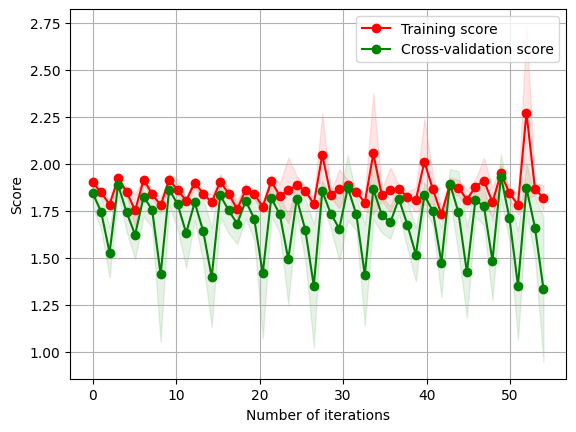

In [119]:
g = plot_learning_curve_cross_validation(df_results,"", method = 'davies_bouldin', ylim=None, train_sizes=np.linspace(0, 54, 54))

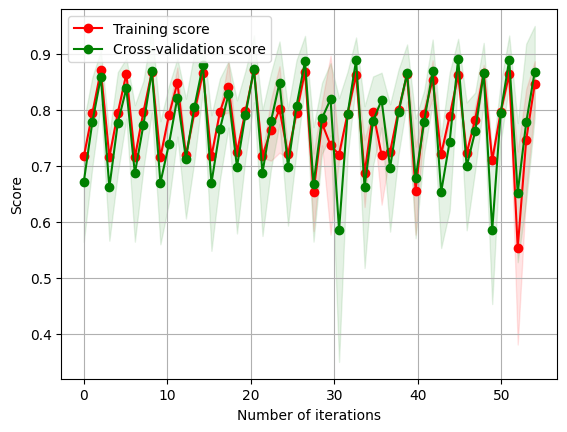

In [120]:
g = plot_learning_curve_cross_validation(df_results,"", method = 'silhouette', ylim=None, train_sizes=np.linspace(0, 54, 54))

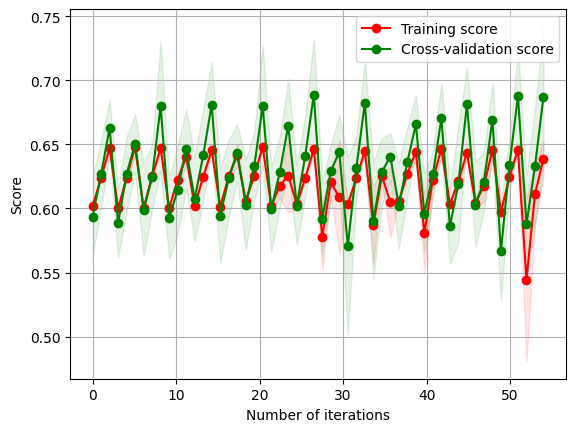

In [121]:
g = plot_learning_curve_cross_validation(df_results,"", method = 'ensemble_metrics', ylim=None, train_sizes=np.linspace(0, 54, 54))

In [122]:
# Identificar a melhor combinação de hiperparâmetros
# best_params_idx = df_results['silhouette_mean_test'].idxmax()
# print(best_params_idx)
best_params_idx = 5
best_params = df_results.loc[best_params_idx]

print("\nMelhores parâmetros encontrados:", best_params['params'])

print("\nMétricas:", best_params)


Melhores parâmetros encontrados: {'n_neighbours': 5, 'scaler': MinMaxScaler(), 'n_epochs': 50, 'lr': 0.01, 'contamination': 0.05}

Métricas: params                           {'n_neighbours': 5, 'scaler': MinMaxScaler(), ...
silhouette_scores_train                           [0.8642, 0.8705, 0.8555, 0.8687]
davies_bouldin_scores_train                       [1.7477, 1.7502, 1.8751, 1.6341]
silhouette_mean_train                                                     0.864725
silhouette_std_train                                                      0.005799
davies_bouldin_mean_train                                                 1.751775
davies_bouldin_std_train                                                  0.085258
silhouette_scores_test                            [0.7522, 0.8563, 0.8997, 0.8448]
davies_bouldin_scores_test                        [1.8105, 1.6205, 1.4433, 1.6161]
silhouette_mean_test                                                       0.83825
silhouette_std_test         

In [123]:
best_params['params']

{'n_neighbours': 5,
 'scaler': MinMaxScaler(),
 'n_epochs': 50,
 'lr': 0.01,
 'contamination': 0.05}

In [124]:
# Criando o modelo LUNAR
lunar_model = LUNAR(**best_params['params'])


In [125]:
# Aplicando o modelo LUNAR
X = df_dataset[['total_value_sent', 'total_value_received',
       'num_transactions_sent', 'num_transactions_received',
       'average_value_sent', 'average_value_received', 'std_dev_sent',
       'std_dev_received', 'outdegree', 'indegree']].values



In [126]:
lunar_model.fit(X)

LUNAR(contamination=0.05, epsilon=0.1, lr=0.01, model_type='WEIGHT',
   n_epochs=50, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [61]:
# # # Criando o modelo LUNAR
# lunar_model =LUNAR(contamination=0.05, epsilon=0.1, lr=0.01, model_type='WEIGHT',
#    n_epochs=50, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
#    scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

# lunar_model.fit(X)

In [127]:
df_dataset['score_anomalous'] = lunar_model.decision_function(X)

In [128]:
# Realizando as previsões (1 = anomalia, 0 = normal)
y_pred = lunar_model.labels_  # Rótulos de anomalias
df_dataset['is_anomalous'] = y_pred

# Extraindo nós anômalos para plotagem
anomalous_nodes = df_dataset[df_dataset['is_anomalous'] == 1]['account_number'].values

In [129]:
df_dataset.is_anomalous.value_counts()

is_anomalous
0    742
1     39
Name: count, dtype: int64

In [130]:
anomalous_nodes

array(['341-9H95-114418', '341.0-9295.0-183835', '341.0-9295.0-114418',
       '341-9H95-183835', '104.0-2175.0-0010136006',
       '104.0-9999.0-999999', '1.0-4775.0-0002108100',
       '341.0-9690.0-007423', '399.0-287.0-0000424188',
       '341.0-2971.0-223132', '1.0-4775.0-0000002108100',
       '341.0-297.0-138729', '341-9H95-364146', '237-3F6H-100X5344',
       '1-AA0H-00000000000000H35474', '0.0-0.0-00000000000000000000',
       '1.0-1903.0-00000000002443007019',
       '1.0-1402.0-00000000005010113011',
       '1.0-1402.0-00000000000000235474', '1.0-0.0-00000000000000000000',
       '33.0-4522.0-00000000000130022544',
       '1.0-1402.0-00000000005100235477', '1-AA0H-00000000000100H35476',
       '1.0-1402.0-00000000006111004011',
       '1.0-1402.0-00000000006111004038', '1-AA0H-00000000005100H35477',
       '21.0-85.0-99999999999999999999', '47.0-14.0-000031232661',
       '47.0-34.0-000010287560', '341-H97-1387HX', '1.0-149.0-0000360260',
       '341-9H95-330X80', '341-9H95-

In [131]:
dataset_anomalous_origem = dataset2[dataset2['ORIGEM'].isin(anomalous_nodes)]
dataset_anomalous_destino = dataset2[dataset2['DESTINO'].isin(anomalous_nodes)]

In [132]:
dataset_anomalous_full = dataset2[(dataset2['DESTINO'].isin(anomalous_nodes))]
dataset_anomalous_full = dataset_anomalous_full[(dataset_anomalous_full['ORIGEM'].isin(anomalous_nodes))]

In [133]:
dataset_anomalous_origem.groupby("NOME_TITULAR_2").ORIGEM.nunique()

NOME_TITULAR_2
INVESTIGADO_1    1
INVESTIGADO_2    3
INVESTIGADO_3    7
INVESTIGADO_4    2
Name: ORIGEM, dtype: int64

In [134]:
dataset_anomalous_destino.groupby("NOME_TITULAR_2").DESTINO.nunique()

NOME_TITULAR_2
INVESTIGADO_1     5
INVESTIGADO_2    10
INVESTIGADO_3    18
INVESTIGADO_4     6
Name: DESTINO, dtype: int64

In [135]:
dataset2.groupby("NOME_TITULAR_2").ORIGEM.nunique()

NOME_TITULAR_2
INVESTIGADO_1    1
INVESTIGADO_2    3
INVESTIGADO_3    8
INVESTIGADO_4    2
Name: ORIGEM, dtype: int64

In [146]:
# dataset_anomalous_full.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO']

In [137]:
dataset_anomalous_origem.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO']

count         mean          std   min    25%     50%     75%  \
NOME_TITULAR_2                                                                  
INVESTIGADO_1    488.0  3559.813525  6992.103782   1.0  600.0  1760.5  4200.0   
INVESTIGADO_2    496.0  4008.086694  8150.366235  10.0  600.0  1100.0  4000.0   
INVESTIGADO_3   1970.0  1391.060914  3559.185588   0.0   53.0   326.0  1045.0   
INVESTIGADO_4    253.0  3066.667984  3889.908449   0.0  300.0  1710.0  4800.0   

                     max  
NOME_TITULAR_2            
INVESTIGADO_1    60000.0  
INVESTIGADO_2   100000.0  
INVESTIGADO_3    48516.0  
INVESTIGADO_4    23000.0

In [138]:
dataset_anomalous_destino.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO']

count         mean           std    min     25%     50%  \
NOME_TITULAR_2                                                             
INVESTIGADO_1    156.0  5744.474359  10913.255743   20.0   950.0  3000.0   
INVESTIGADO_2    207.0  6619.333333  11463.443622  100.0  1000.0  2000.0   
INVESTIGADO_3   1066.0  1762.699812   4434.327842    0.0    13.0   220.5   
INVESTIGADO_4    180.0  3161.194444   4199.700742    0.0   290.5  1600.0   

                   75%       max  
NOME_TITULAR_2                    
INVESTIGADO_1   5000.0   60000.0  
INVESTIGADO_2   8091.5  100000.0  
INVESTIGADO_3   1057.5   48516.0  
INVESTIGADO_4   5000.0   23000.0

In [139]:
dataset_origem = dataset2[~(dataset2['ORIGEM'].isin(anomalous_nodes))]
dataset_destino = dataset2[~(dataset2['DESTINO'].isin(anomalous_nodes))]
# dataset_destino = dataset_destino[~(dataset_destino['VALOR_TRANSACAO']>=100000)]

In [140]:
dataset_origem.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO']

count         mean          std   min    25%    50%     75%  \
NOME_TITULAR_2                                                                
INVESTIGADO_3   159.0  1432.937107  1544.043089  69.0  500.0  800.0  1900.0   

                   max  
NOME_TITULAR_2          
INVESTIGADO_3   8000.0

In [141]:
dataset_destino.groupby("NOME_TITULAR_2").describe()['VALOR_TRANSACAO']

count         mean          std   min    25%     50%     75%  \
NOME_TITULAR_2                                                                  
INVESTIGADO_1    332.0  2533.286145  3585.144680   1.0  600.0  1500.0  3000.0   
INVESTIGADO_2    289.0  2137.747405  3430.408563  10.0  470.0  1000.0  2000.0   
INVESTIGADO_3   1063.0  1024.636877  1962.101371   6.0  160.0   500.0  1100.0   
INVESTIGADO_4     73.0  2833.589041  3005.609408  30.0  500.0  2000.0  4000.0   

                    max  
NOME_TITULAR_2           
INVESTIGADO_1   30000.0  
INVESTIGADO_2   25500.0  
INVESTIGADO_3   30000.0  
INVESTIGADO_4   14000.0

In [142]:
dataset2[dataset2['VALOR_TRANSACAO']>=100000]

Unnamed: 0         NUMERO_CASO  NUMERO_BANCO         NOME_BANCO  \
1613        1673  0BB-PCSE-0000AA-34           341  ITAU UNIBANCO S/A   

     NUMERO_AGENCIA NUMERO_CONTA  TIPO NOME_TITULAR DESCRICAO_LANCAMENTO  \
1613           9H95       183835     1        MEVIO     AG. TED   601346   

     DATA_LANCAMENTO  ...  NUMERO_DOCUMENTO_TRANSACAO  VALOR_TRANSACAO  \
1613      2014-08-20  ...                      601346         100000.0   

      NATUREZA_LANCAMENTO NUMERO_BANCO_OD  NUMERO_AGENCIA_OD  NUMERO_CONTA_OD  \
1613                    D             1.0             4775.0       0002108100   

     OBSERVACAO           ORIGEM                DESTINO NOME_TITULAR_2  
1613        NaN  341-9H95-183835  1.0-4775.0-0002108100  INVESTIGADO_2  

[1 rows x 21 columns]

In [143]:
dataset2.NATUREZA_LANCAMENTO.value_counts()

NATUREZA_LANCAMENTO
D    1821
C    1452
*      93
Name: count, dtype: int64

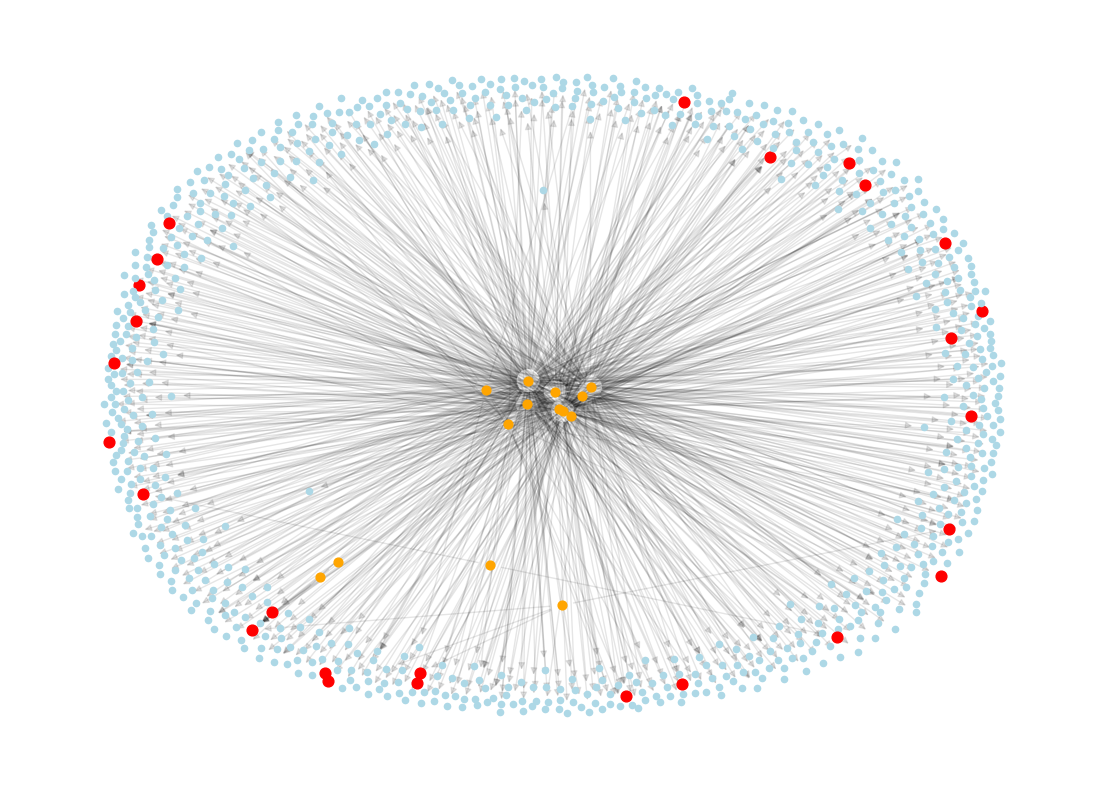

In [144]:
# Criando o grafo a partir dos dados
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph())

# Layout para a organização dos nós
pos = nx.spring_layout(G, seed=42)

# Plotando o grafo
plt.figure(figsize=(14, 10))

# Desenhando as arestas
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='black')

# Desenhando os nós
for node in G.nodes():
    if any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='orange', node_size=40)
    elif node in anomalous_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=60)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightblue', node_size=20)

# Removendo eixos para melhor visualização
plt.axis('off')

# Exibindo o gráfico
plt.show()

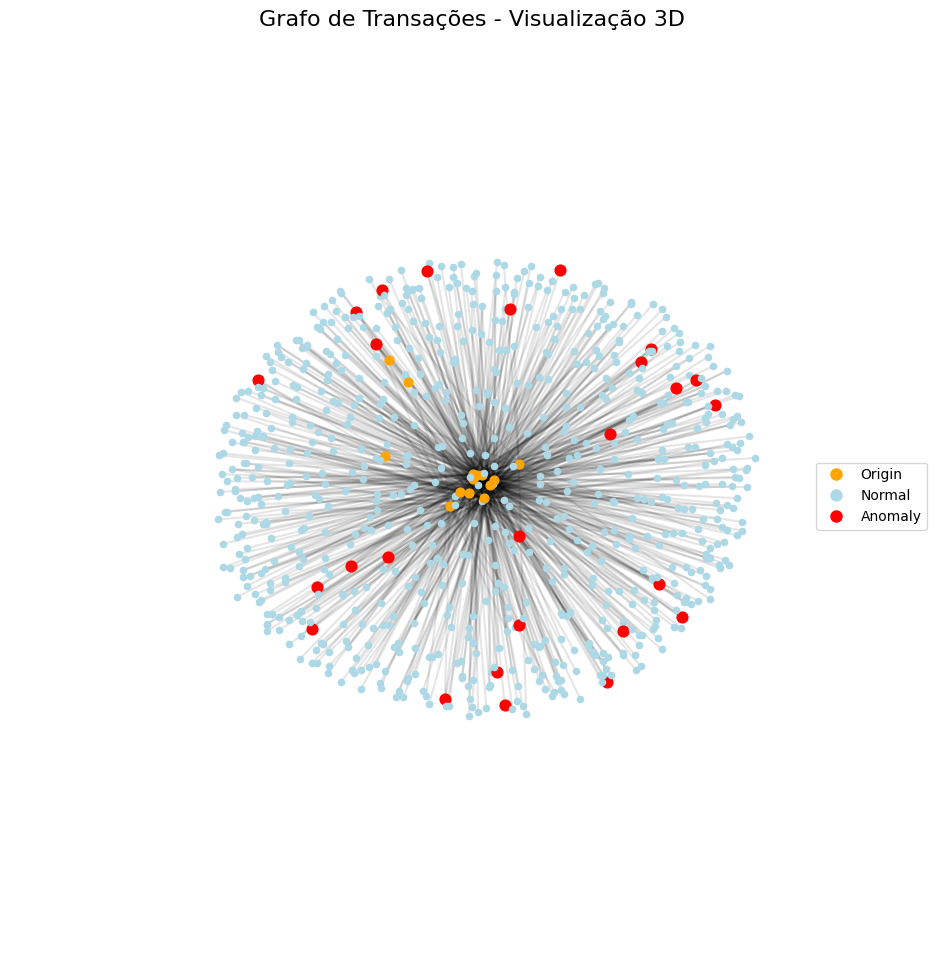

In [148]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Construindo o grafo a partir dos dados com bancos e agências
G = nx.from_pandas_edgelist(dataset2, 'ORIGEM', 'DESTINO', ['VALOR_TRANSACAO', 'DATA_LANCAMENTO'], create_using=nx.DiGraph()) #nx.MultiDiGraph()


# Layout para a organização dos nós em 3D
pos = nx.spring_layout(G, seed=42, dim=3)  # Alterado para 3 dimensões

# Plotando o grafo em 3D
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Desenhando as arestas
for edge in G.edges():
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    z = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x, y, z, color='black', alpha=0.1)

# Inicializando variáveis para a legenda
legend_elements = []
added_anomalous = False
added_origin = False
added_other = False

# Desenhando os nós
for node in G.nodes():
    x, y, z = pos[node]
    if any(n in G.successors(node) for n in G.nodes()):  # Se o nó é uma origem
        ax.scatter(x, y, z, color='orange', s=40)  # Nós de origem
        if not added_origin:  # Adiciona elemento à legenda uma única vez
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Origin', markerfacecolor='orange', markersize=10))
            added_origin = True
    elif node in anomalous_nodes:
        ax.scatter(x, y, z, color='red', s=60)  # Nós anômalos
        if not added_anomalous:  # Adiciona elemento à legenda uma única vez
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Anomaly', markerfacecolor='red', markersize=10))
            added_anomalous = True
    else:
        ax.scatter(x, y, z, color='lightblue', s=20)  # Outros nós
        if not added_other:  # Adiciona elemento à legenda uma única vez
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='lightblue', markersize=10))
            added_other = True

# Adicionando a legenda
ax.legend(handles=legend_elements, loc='center right', fontsize='medium')

# Removendo eixos para melhor visualização
ax.set_axis_off()

# Título do gráfico
ax.set_title('Grafo de Transações - Visualização 3D', fontsize=16)

# Exibindo o gráfico
plt.show()

In [149]:
df_dataset

account_number  total_value_sent  total_value_received  \
0            341-9H95-114418          187920.0                   0.0   
1         341.0-646.0-745232               0.0                2023.0   
2        341.0-9295.0-183835               0.0              768251.0   
3    104.0-2448.0-3000008512               0.0                 250.0   
4    237.0-2628.0-0107100078               0.0                 400.0   
..                       ...               ...                   ...   
776   47.0-47.0-000010111103               0.0                 200.0   
777   47.0-29.0-000010496082               0.0                1999.0   
778   47.0-43.0-000010017309               0.0                 788.0   
779          341-9H95-36X756           62003.0                   0.0   
780  237.0-1438.0-6540100323               0.0                 200.0   

     num_transactions_sent  num_transactions_received  average_value_sent  \
0                       84                          0         2237.142857   
1                        0                         14            0.000000   
2                        0                        148            0.000000   
3                        0                          1            0.000000   
4                        0                          1            0.000000   
..                     ...                        ...                 ...   
776                      0                          1            0.000000   
777                      0                          3            0.000000   
778                      0                          1            0.000000   
779                     12                          0         5166.916667   
780                      0                          1            0.000000   

     average_value_received  std_dev_sent  std_dev_received  outdegree  \
0                  0.000000   2862.278089          0.000000         84   
1                144.500000      0.000000        172.988749          0   
2               5190.885135      0.000000       7033.769095          0   
3                250.000000      0.000000          0.000000          0   
4                400.000000      0.000000          0.000000          0   
..                      ...           ...               ...        ...   
776              200.000000      0.000000          0.000000          0   
777              666.333333      0.000000        364.637110          0   
778              788.000000      0.000000          0.000000          0   
779                0.000000   5403.208699          0.000000         12   
780              200.000000      0.000000          0.000000          0   

     indegree  score_anomalous  is_anomalous    Event  
0           0         0.204982             1  Anomaly  
1          14         0.012355             0   Normal  
2         148         0.417742             1  Anomaly  
3           1         0.000000             0   Normal  
4           1         0.000000             0   Normal  
..        ...              ...           ...      ...  
776         1         0.000000             0   Normal  
777         3         0.003106             0   Normal  
778         1         0.000110             0   Normal  
779         0         0.273632             1  Anomaly  
780         1         0.000000             0   Normal  

[781 rows x 14 columns]

In [150]:
df_dataset['Event'] = df_dataset['is_anomalous'].apply(lambda x: "Anomaly" if x==1 else "Normal")

In [151]:
df_dataset.is_anomalous.value_counts()

is_anomalous
0    742
1     39
Name: count, dtype: int64

In [152]:
data = df_dataset.drop(columns=['account_number', 'Event', 'is_anomalous', 'score_anomalous'])

In [153]:
data2 = df_dataset.drop(columns=['account_number', 'score_anomalous'])

### kruskal test

In [154]:
import pandas as pd
from scipy.stats import kruskal

# Supondo que df_dataset seja o seu DataFrame
# Separar as variáveis
X = df_dataset[['total_value_sent', 'total_value_received',
                 'num_transactions_sent', 'num_transactions_received',
                 'average_value_sent', 'average_value_received',
                 'std_dev_sent', 'std_dev_received', 
                 'outdegree', 'indegree']]

# A variável Y deve ser categórica para o teste de Kruskal-Wallis
Y = df_dataset['is_anomalous']

# Criar um dicionário para armazenar os resultados
results = {}

# Realizar o teste Kruskal-Wallis para cada variável em X
for col in X.columns:
    # Agrupar os dados por Y
    groups = [X[Y == category][col] for category in Y.unique()]
    
    # Executar o teste
    statistic, p_value = kruskal(*groups)
    
    # Armazenar os resultados
    results[col] = {'statistic': statistic, 'p_value': p_value}

# Exibir os resultados
for variable, stats in results.items():
    print(f'Variable: {variable}, Statistic: {stats["statistic"]}, p-value: {stats["p_value"]}')


Variable: total_value_sent, Statistic: 212.05204809102167, p-value: 4.8997868827705415e-48
Variable: total_value_received, Statistic: 5.250738634674132, p-value: 0.021937456887669172
Variable: num_transactions_sent, Statistic: 231.5047864517351, p-value: 2.800130713889592e-52
Variable: num_transactions_received, Statistic: 3.661665647176253, p-value: 0.05567794481356857
Variable: average_value_sent, Statistic: 212.43502947473897, p-value: 4.042272789243328e-48
Variable: average_value_received, Statistic: 0.35142870357561684, p-value: 0.5533054877607153
Variable: std_dev_sent, Statistic: 193.04792087868142, p-value: 6.871678787239224e-44
Variable: std_dev_received, Statistic: 39.5081980364641, p-value: 3.2668508436731003e-10
Variable: outdegree, Statistic: 231.5047864517351, p-value: 2.800130713889592e-52
Variable: indegree, Statistic: 3.661665647176253, p-value: 0.05567794481356857


### Análise descritiva

In [155]:
data2[data2['Event']=='Normal'].describe()

total_value_sent  total_value_received  num_transactions_sent  \
count        742.000000            742.000000             742.000000   
mean         307.057951           3712.804582               0.214286   
std         8364.159401           8622.728407               5.837074   
min            0.000000              0.000000               0.000000   
25%            0.000000            383.750000               0.000000   
50%            0.000000           1000.000000               0.000000   
75%            0.000000           2893.000000               0.000000   
max       227837.000000          93660.000000             159.000000   

       num_transactions_received  average_value_sent  average_value_received  \
count                 742.000000          742.000000              742.000000   
mean                    2.367925            1.931182             1819.448002   
std                     5.027395           52.604776             3356.277494   
min                     0.000000            0.000000                0.000000   
25%                     1.000000            0.000000              300.000000   
50%                     1.000000            0.000000              772.000000   
75%                     2.000000            0.000000             1788.166667   
max                    59.000000         1432.937107            30000.000000   

       std_dev_sent  std_dev_received   outdegree    indegree  is_anomalous  
count    742.000000        742.000000  742.000000  742.000000         742.0  
mean       2.074367        135.149339    0.214286    2.367925           0.0  
std       56.505074        496.167106    5.837074    5.027395           0.0  
min        0.000000          0.000000    0.000000    0.000000           0.0  
25%        0.000000          0.000000    0.000000    1.000000           0.0  
50%        0.000000          0.000000    0.000000    1.000000           0.0  
75%        0.000000          0.000000    0.000000    2.000000           0.0  
max     1539.179949       5901.846114  159.000000   59.000000           0.0

In [156]:
data2[data2['Event']=='Anomaly'].describe()

total_value_sent  total_value_received  num_transactions_sent  \
count      3.900000e+01             39.000000              39.000000   
mean       1.856784e+05         120881.871795              82.230769   
std        4.751746e+05         189283.961250             244.365393   
min        0.000000e+00              0.000000               0.000000   
25%        0.000000e+00              0.000000               0.000000   
50%        0.000000e+00          34501.000000               0.000000   
75%        3.002700e+04         140114.500000              16.000000   
max        1.797536e+06         768251.000000            1401.000000   

       num_transactions_received  average_value_sent  average_value_received  \
count                  39.000000           39.000000               39.000000   
mean                   41.256410          968.597248            10910.859578   
std                    70.406982         2035.330172            17708.491057   
min                     0.000000            0.000000                0.000000   
25%                     0.000000            0.000000                0.000000   
50%                     3.000000            0.000000             2871.426901   
75%                    66.000000          934.054604            13012.250000   
max                   333.000000        10000.000000            70000.000000   

       std_dev_sent  std_dev_received    outdegree    indegree  is_anomalous  
count     39.000000         39.000000    39.000000   39.000000          39.0  
mean    1158.052292       4412.451289    82.230769   41.256410           1.0  
std     2327.249427       8238.609057   244.365393   70.406982           0.0  
min        0.000000          0.000000     0.000000    0.000000           1.0  
25%        0.000000          0.000000     0.000000    0.000000           1.0  
50%        0.000000         16.887840     0.000000    3.000000           1.0  
75%      659.623874       5307.780375    16.000000   66.000000           1.0  
max     8822.979526      43652.669512  1401.000000  333.000000           1.0

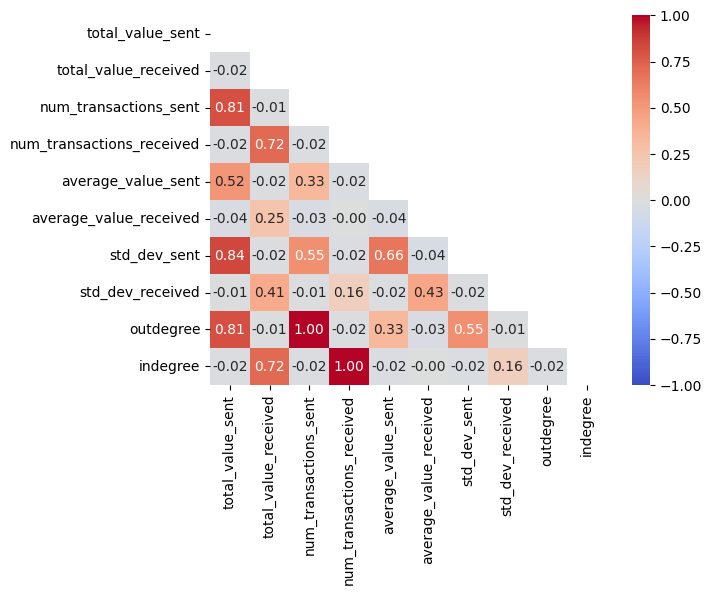

In [157]:
corrmat = np.triu(data.corr(method='pearson'))
g = sns.heatmap(data.corr(method='pearson'),cmap="coolwarm",annot=True, mask = corrmat, fmt=".2f", vmax=1, vmin=-1)

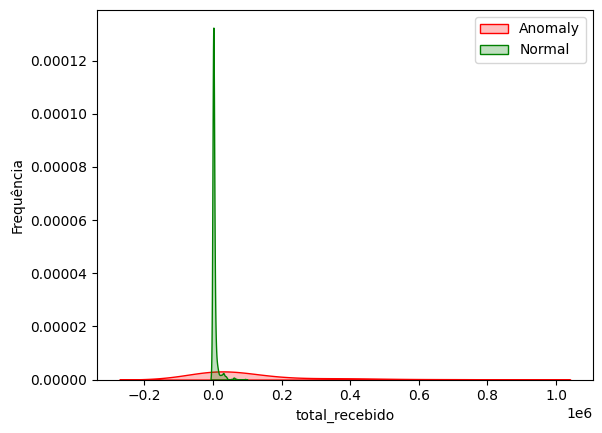

In [158]:
g = sns.kdeplot(df_dataset["total_value_received"][(df_dataset["is_anomalous"] == 1) & (df_dataset["total_value_received"].notnull())], color="Red", fill = True)
g = sns.kdeplot(df_dataset["total_value_received"][(df_dataset["is_anomalous"] == 0) & (df_dataset["total_value_received"].notnull())], ax =g, color="Green", fill= True)

g.set_xlabel("total_recebido")
g.set_ylabel("Frequência")
g = g.legend(['Anomaly', 'Normal'])

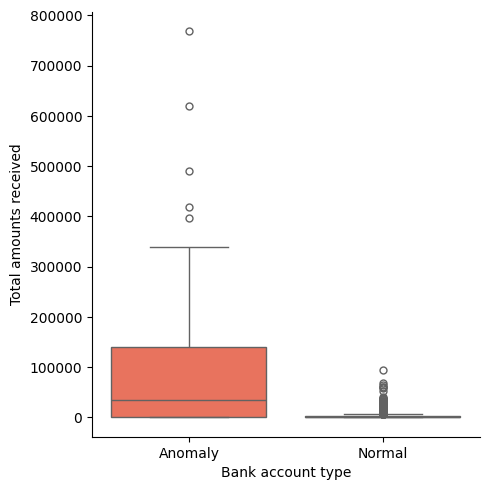

In [159]:
color_map = {
    'Normal': 'lightblue',
    'Anomaly': 'tomato'
}
g = sns.catplot(y="total_value_received",x="Event",data=df_dataset,kind="box", hue="Event", palette=color_map)
g.set_axis_labels("Bank account type", "Total amounts received") 

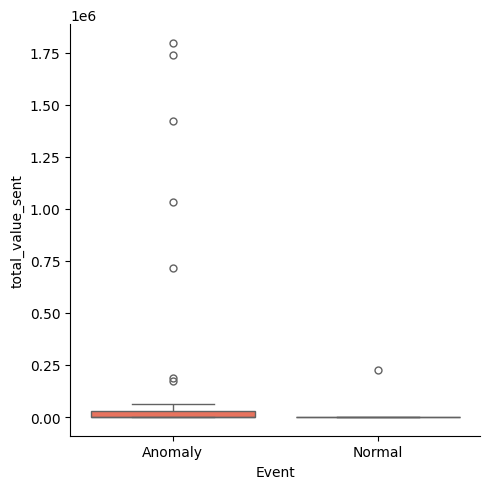

In [160]:
color_map = {
    'Normal': 'lightblue',
    'Anomaly': 'tomato'
}
g = sns.catplot(y="total_value_sent",x="Event",data=df_dataset,kind="box", hue="Event", palette=color_map)
g.set_axis_labels("Event", "total_value_sent") 

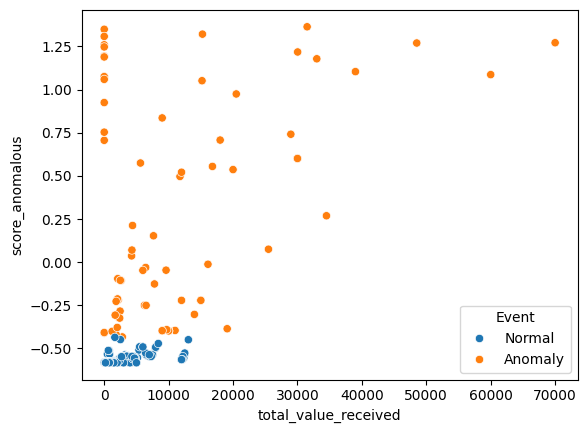

In [201]:
sns.scatterplot(x='total_value_received', 
                y='score_anomalous', 
                data=df_dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='Event', hue_order = ["Normal", "Anomaly"],  sizes=(100))
plt.show()

In [264]:
   
# Silhouette Score
silhueta = round(silhouette_score(data, data2.is_anomalous), 4)

# Davies-Bouldin Index
db_index = round(davies_bouldin_score(data, data2.is_anomalous), 4)

# Calinski-Harabasz Index
ch_index = round(calinski_harabasz_score(data, data2.is_anomalous), 4)

# Criando um DataFrame com os resultados
resultados_aux = {
    'silhueta': silhueta,
    'davies_bouldin': db_index,
    'calinski_harabasz': ch_index
}

resultados_aux = pd.DataFrame(resultados_aux, index=[k])


if first:
    resultados_final = resultados_aux
    first = False
else:
    resultados_final = pd.concat([resultados_final, resultados_aux], axis=0)


resultados_final

silhueta  davies_bouldin  calinski_harabasz
9    0.7834          1.7849            61.4342

### Modelagem com K-means

In [252]:
data.head()

total_value_sent  total_value_received  num_transactions_sent  \
0             26060                     0                     19   
1                 0                    41                      0   
2                 0                 30028                      0   
3                 0                   250                      0   
4                 0                   400                      0   

   num_transactions_received  average_value_sent  average_value_received  \
0                          0         1371.578947                0.000000   
1                          1            0.000000               41.000000   
2                          6            0.000000             5004.666667   
3                          1            0.000000              250.000000   
4                          1            0.000000              400.000000   

   std_dev_sent  std_dev_received  outdegree  indegree  
0   1846.961867          0.000000         19         0  
1      0.000000          0.000000          0         1  
2      0.000000       4723.322971          0         6  
3      0.000000          0.000000          0         1  
4      0.000000          0.000000          0         1

In [254]:
# data_k = data.drop(columns=['score_anomalous'])
# data_k.head()

In [255]:
# scaler = StandardScaler()
# dados_p = pd.DataFrame(scaler.fit_transform(data_k))

minmax = MinMaxScaler()
dados_p = pd.DataFrame(minmax.fit_transform(data))

In [256]:
dados_p.head()

0         1         2         3         4         5         6  \
0  0.047471  0.000000  0.094527  0.000000  0.123319  0.000000  0.115228   
1  0.000000  0.000586  0.000000  0.166667  0.000000  0.000586  0.000000   
2  0.000000  0.428971  0.000000  1.000000  0.000000  0.071495  0.000000   
3  0.000000  0.003571  0.000000  0.166667  0.000000  0.003571  0.000000   
4  0.000000  0.005714  0.000000  0.166667  0.000000  0.005714  0.000000   

          7         8         9  
0  0.000000  0.094527  0.000000  
1  0.000000  0.000000  0.166667  
2  0.349876  0.000000  1.000000  
3  0.000000  0.000000  0.166667  
4  0.000000  0.000000  0.166667

In [257]:
kmeans = KMeans(n_clusters=10, max_iter=1,init='k-means++', n_init=10, random_state=42)
kmeans.fit(dados_p)

centroides = kmeans.cluster_centers_

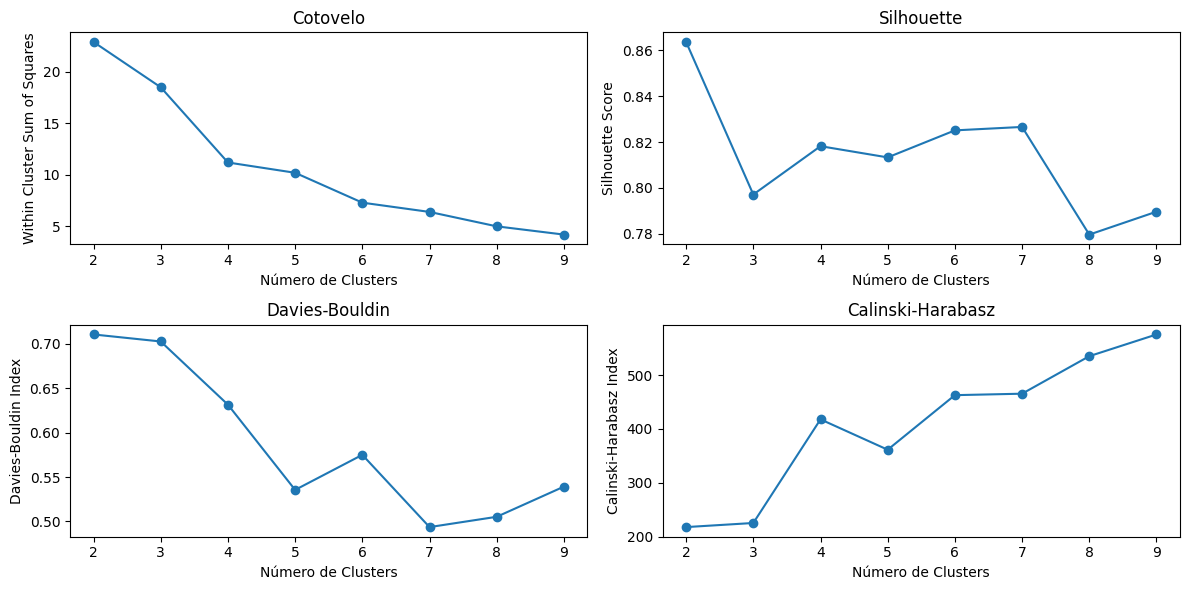

score_wss  silhueta  davies_bouldin  calinski_harabasz
2       22.9    0.8637          0.7106           217.6424
3       18.5    0.7971          0.7027           225.2579
4       11.2    0.8182          0.6315           417.6787
5       10.2    0.8133          0.5355           361.2838
6        7.3    0.8251          0.5750           462.5971
7        6.4    0.8266          0.4936           465.3076
8        5.0    0.7796          0.5052           534.9636
9        4.2    0.7896          0.5392           575.2824

In [258]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

# Definindo os valores de k
k_values = range(2, 10)
first = True

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=10, init=centroides[0:k, :], n_init=1, random_state=32)
    cluster_labels = kmeans.fit_predict(dados_p)
    
    # WCSS (Within Cluster Sum of Squares)
    score_wss = round(kmeans.inertia_, 1)
    
    # Silhouette Score
    silhueta = round(silhouette_score(dados_p, cluster_labels), 4)
    
    # Davies-Bouldin Index
    db_index = round(davies_bouldin_score(dados_p, cluster_labels), 4)
    
    # Calinski-Harabasz Index
    ch_index = round(calinski_harabasz_score(dados_p, cluster_labels), 4)
    
    # Criando um DataFrame com os resultados
    resultados_aux = {
        'score_wss': score_wss,
        'silhueta': silhueta,
        'davies_bouldin': db_index,
        'calinski_harabasz': ch_index
    }
    
    resultados_aux = pd.DataFrame(resultados_aux, index=[k])
    
    if first:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux], axis=0)

# Plotando WCSS
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(resultados_final.index, resultados_final.score_wss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Cotovelo')

# Plotando Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(resultados_final.index, resultados_final.silhueta, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')

# Plotando Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(resultados_final.index, resultados_final.davies_bouldin, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin')

# Plotando Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(resultados_final.index, resultados_final.calinski_harabasz, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz')

plt.tight_layout()
plt.show()

resultados_final

In [60]:
KM_final = KMeans(n_clusters = 2, init = centroides[0:2,:], n_init = 1, max_iter=50, random_state=42)

KM_final.fit(dados_p)
clusters_labels = KM_final.predict(dados_p)

print ('Centroides: ', KM_final.cluster_centers_)
print ('\nInertia ou WCSS: ',KM_final.inertia_)
print ('\nClusters preditos: ' , clusters_labels)

Centroides:  [[ 4.45312536e-03  2.50364603e-02  5.37781069e-03  1.75369887e-01
   5.28887156e-03  2.25803369e-02  4.33601902e-03  3.28973552e-03
   5.37781069e-03  1.75369887e-01  0.00000000e+00]
 [ 8.67361738e-19  5.04862857e-01 -8.67361738e-19  2.44444444e-01
   8.67361738e-19  4.50316825e-01  8.67361738e-19  1.10979373e-01
  -8.67361738e-19  2.44444444e-01  0.00000000e+00]]

Inertia ou WCSS:  22.87750839031802

Clusters preditos:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [61]:
df_dataset['cluster'] = clusters_labels
df_dataset.loc[(df_dataset['cluster']==0), "cluster"] = 'cluster_1'
df_dataset.loc[(df_dataset['cluster']==1), "cluster"] = 'cluster_2'
# df_dataset.loc[(df_dataset['cluster']==2), "cluster"] = 'cluster_3'
# df_dataset.loc[(df_dataset['cluster']==3), "cluster"] = 'cluster_4'
# df_dataset.loc[(df_dataset['cluster']==4), "cluster"] = 'cluster_5'
# df_dataset.loc[(df_dataset['cluster']==5), "cluster"] = 'cluster_6'
# df_dataset.loc[(df_dataset['cluster']==6), "cluster"] = 'cluster_7'

C:\Users\User\AppData\Local\Temp\ipykernel_3084\3635855448.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cluster_1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_dataset.loc[(df_dataset['cluster']==0), "cluster"] = 'cluster_1'


In [62]:
df_dataset.head()

account_number  total_sent  total_received  num_transactions_sent  \
0          341-9H95-114418       26060               0                     19   
1       341.0-646.0-745232           0              41                      0   
2      341.0-9295.0-183835           0           30028                      0   
3  104.0-2448.0-3000008512           0             250                      0   
4  237.0-2628.0-0107100078           0             400                      0   

   num_transactions_received  average_value_sent  average_value_received  \
0                          0         1371.578947                0.000000   
1                          1            0.000000               41.000000   
2                          6            0.000000             5004.666667   
3                          1            0.000000              250.000000   
4                          1            0.000000              400.000000   

   std_dev_sent  std_dev_received  outdegree  indegree  variation_rate  \
0   1846.961867          0.000000         19         0             0.0   
1      0.000000          0.000000          0         1             0.0   
2      0.000000       4723.322971          0         6             0.0   
3      0.000000          0.000000          0         1             0.0   
4      0.000000          0.000000          0         1             0.0   

   is_anomalous  score_anomalous    Event    cluster  
0             1         0.093302  Anomaly  cluster_1  
1             0         0.000099   Normal  cluster_1  
2             1         0.705357  Anomaly  cluster_2  
3             0         0.000000   Normal  cluster_1  
4             0         0.000000   Normal  cluster_1

### Análise descritiva dos Clusters

In [63]:
df_dataset[df_dataset['cluster']=='cluster_1']['total_received'].describe()

count      766.000000
mean      1752.552219
std       2808.246192
min          0.000000
25%        300.000000
50%        750.000000
75%       1800.000000
max      20500.000000
Name: total_received, dtype: float64

In [64]:
df_dataset[df_dataset['cluster']=='cluster_2']['total_received'].describe()

count       15.000000
mean     35340.400000
std      14060.814088
min      19090.000000
25%      29485.500000
50%      30028.000000
75%      36750.500000
max      70000.000000
Name: total_received, dtype: float64

In [93]:
df_dataset[(df_dataset['cluster']=='cluster_1')&(df_dataset['is_anomalous']==1)]['total_received'].describe()

count       63.000000
mean      5777.333333
std       5696.954353
min          0.000000
25%        988.500000
50%       3792.000000
75%       9300.000000
max      20500.000000
Name: total_received, dtype: float64

In [65]:
# df_dataset[df_dataset['cluster']=='cluster_3']['total_received'].describe()

In [112]:
# df_dataset[df_dataset['cluster']=='cluster_4']['total_recebido'].describe()

In [113]:
# df_dataset[df_dataset['cluster']=='cluster_5']['total_recebido'].describe()

In [114]:
# df_dataset[df_dataset['cluster']=='cluster_6']['total_recebido'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_3084\2986520293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="total_sent",y="cluster",data=df_dataset,kind="box", order=order_of_clusters, palette="Set2")


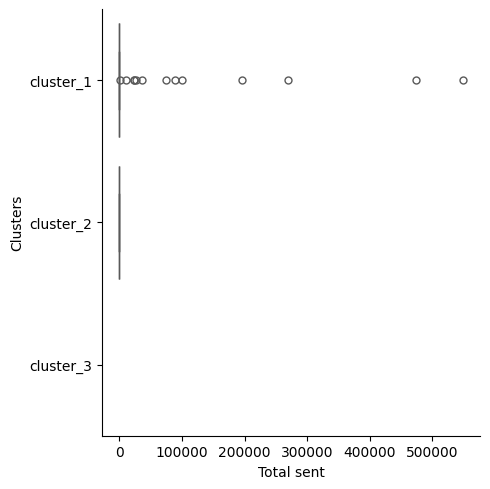

In [66]:
order_of_clusters = ['cluster_1', 'cluster_2', 'cluster_3']  

g = sns.catplot(x="total_sent",y="cluster",data=df_dataset,kind="box", order=order_of_clusters, palette="Set2")
g.set_axis_labels("Total sent", "Clusters")

C:\Users\User\AppData\Local\Temp\ipykernel_3084\3343530603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="total_received",y="cluster",data=df_dataset,kind="box", order=order_of_clusters, palette="Set2")


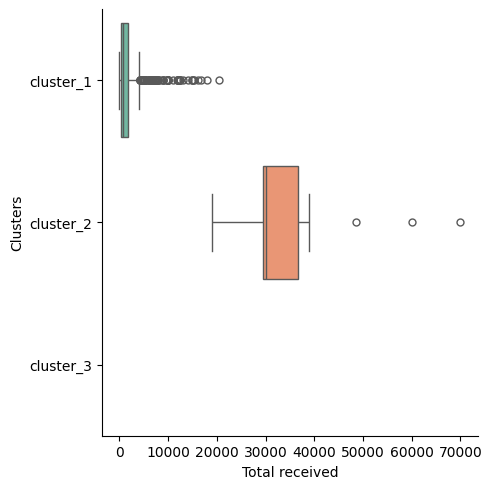

In [67]:
order_of_clusters = ['cluster_1', 'cluster_2', 'cluster_3']  

g = sns.catplot(x="total_received",y="cluster",data=df_dataset,kind="box", order=order_of_clusters, palette="Set2")
g.set_axis_labels("Total received", "Clusters")

In [68]:
pd.crosstab(df_dataset['cluster'], df_dataset['Event'], margins=True)

Event      Anomaly  Normal  All
cluster                        
cluster_1       63     703  766
cluster_2       15       0   15
All             78     703  781

In [69]:
df_dataset.head()

account_number  total_sent  total_received  num_transactions_sent  \
0          341-9H95-114418       26060               0                     19   
1       341.0-646.0-745232           0              41                      0   
2      341.0-9295.0-183835           0           30028                      0   
3  104.0-2448.0-3000008512           0             250                      0   
4  237.0-2628.0-0107100078           0             400                      0   

   num_transactions_received  average_value_sent  average_value_received  \
0                          0         1371.578947                0.000000   
1                          1            0.000000               41.000000   
2                          6            0.000000             5004.666667   
3                          1            0.000000              250.000000   
4                          1            0.000000              400.000000   

   std_dev_sent  std_dev_received  outdegree  indegree  variation_rate  \
0   1846.961867          0.000000         19         0             0.0   
1      0.000000          0.000000          0         1             0.0   
2      0.000000       4723.322971          0         6             0.0   
3      0.000000          0.000000          0         1             0.0   
4      0.000000          0.000000          0         1             0.0   

   is_anomalous  score_anomalous    Event    cluster  
0             1         0.093302  Anomaly  cluster_1  
1             0         0.000099   Normal  cluster_1  
2             1         0.705357  Anomaly  cluster_2  
3             0         0.000000   Normal  cluster_1  
4             0         0.000000   Normal  cluster_1

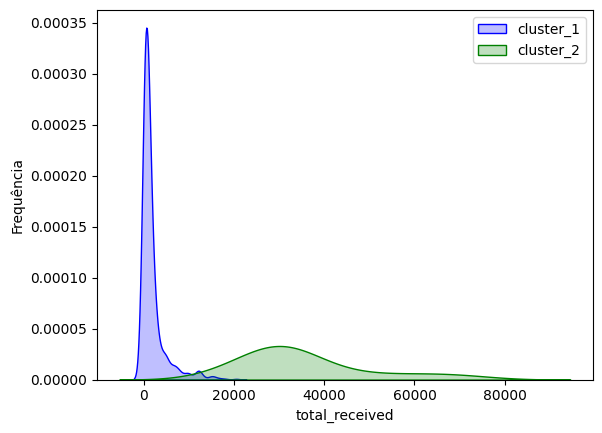

In [70]:
g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_1') & (df_dataset["total_received"].notnull())], color="Blue", fill = True)
g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_2') & (df_dataset["total_received"].notnull())], ax =g, color="Green", fill= True)
# g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_3') & (df_dataset["total_received"].notnull())], ax =g, color="Purple", fill= True)
# g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_4') & (df_dataset["total_received"].notnull())], ax =g, color="Red", fill= True)
# g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_5') & (df_dataset["total_received"].notnull())], ax =g, color="Orange", fill= True)
# g = sns.kdeplot(df_dataset["total_received"][(df_dataset["cluster"] == 'cluster_6') & (df_dataset["total_received"].notnull())], ax =g, color="Yellow", fill= True)
g.set_xlabel("total_received")
g.set_ylabel("Frequência")
g = g.legend(['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])

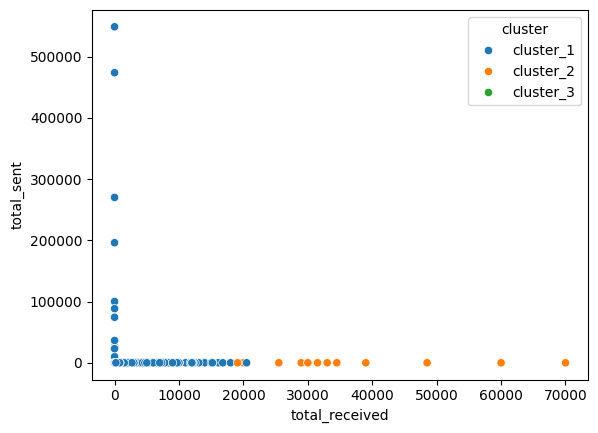

In [71]:
sns.scatterplot(x='total_received', 
                y='total_sent', 
                data=df_dataset, 
                hue='cluster', hue_order = ['cluster_1', 'cluster_2', 'cluster_3'],  sizes=(100))
plt.show()

### Análise de Componentes Principais

In [72]:
pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, 
          iterated_power='auto', random_state=42)

pca.fit(dados_p)

PCA(n_components=4, random_state=42)

In [73]:
pca.explained_variance_ratio_

array([0.37031816, 0.30040079, 0.18069343, 0.08758951])

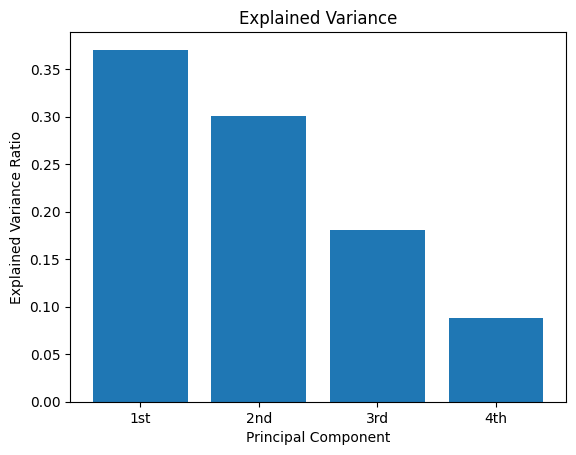

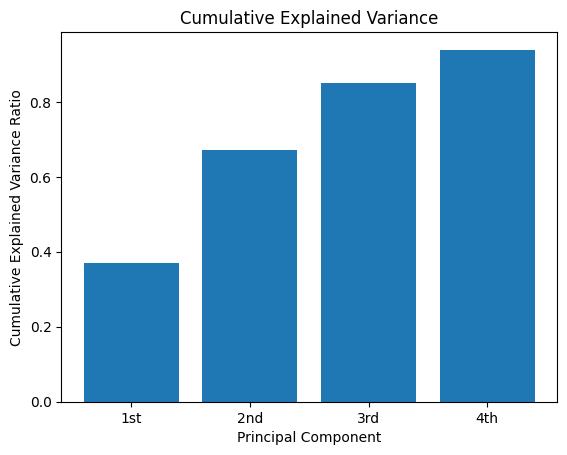

   Component  Explained Variance  Cumulative Explained Variance
0          1            0.370318                       0.370318
1          2            0.300401                       0.670719
2          3            0.180693                       0.851412
3          4            0.087590                       0.939002


In [74]:
range_x = np.arange(4)

plt.bar(range_x,pca.explained_variance_ratio_)
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance')
plt.show()

plt.bar(range_x,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

d = {'Component': np.r_[1:len(pca.explained_variance_ratio_)+1], 
     'Explained Variance': pca.explained_variance_ratio_, 
     'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)

print(df)

Text(0, 0.5, 'Cumulative Explained Variance')

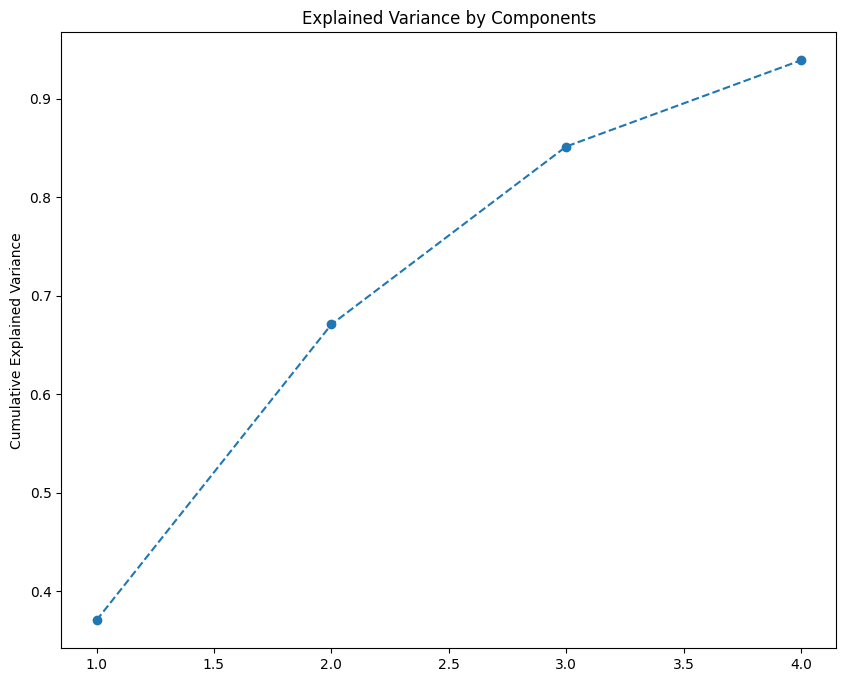

In [75]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.ylabel("Cumulative Explained Variance")

In [76]:
pca = PCA(n_components=2, random_state=42)

In [77]:
pca.fit(dados_p)

PCA(n_components=2, random_state=42)

In [78]:
score_pca = pca.fit_transform(dados_p)

In [79]:
column_names = ["PC_1", "PC_2"]
score_pca = pd.DataFrame(score_pca, columns=column_names)
score_pca

PC_1      PC_2
0    0.257926  0.147285
1    0.031660 -0.036402
2   -0.833457 -0.013737
3    0.028863 -0.033428
4    0.026855 -0.031293
..        ...       ...
776  0.029532 -0.034139
777  0.020967 -0.025030
778  0.021663 -0.025770
779  0.368364  0.265835
780  0.029532 -0.034139

[781 rows x 2 columns]

In [80]:
d = pd.concat([score_pca, df_dataset], axis=1)
d.head()

PC_1      PC_2           account_number  total_sent  total_received  \
0  0.257926  0.147285          341-9H95-114418       26060               0   
1  0.031660 -0.036402       341.0-646.0-745232           0              41   
2 -0.833457 -0.013737      341.0-9295.0-183835           0           30028   
3  0.028863 -0.033428  104.0-2448.0-3000008512           0             250   
4  0.026855 -0.031293  237.0-2628.0-0107100078           0             400   

   num_transactions_sent  num_transactions_received  average_value_sent  \
0                     19                          0         1371.578947   
1                      0                          1            0.000000   
2                      0                          6            0.000000   
3                      0                          1            0.000000   
4                      0                          1            0.000000   

   average_value_received  std_dev_sent  std_dev_received  outdegree  \
0                0.000000   1846.961867          0.000000         19   
1               41.000000      0.000000          0.000000          0   
2             5004.666667      0.000000       4723.322971          0   
3              250.000000      0.000000          0.000000          0   
4              400.000000      0.000000          0.000000          0   

   indegree  variation_rate  is_anomalous  score_anomalous    Event    cluster  
0         0             0.0             1         0.093302  Anomaly  cluster_1  
1         1             0.0             0         0.000099   Normal  cluster_1  
2         6             0.0             1         0.705357  Anomaly  cluster_2  
3         1             0.0             0         0.000000   Normal  cluster_1  
4         1             0.0             0         0.000000   Normal  cluster_1

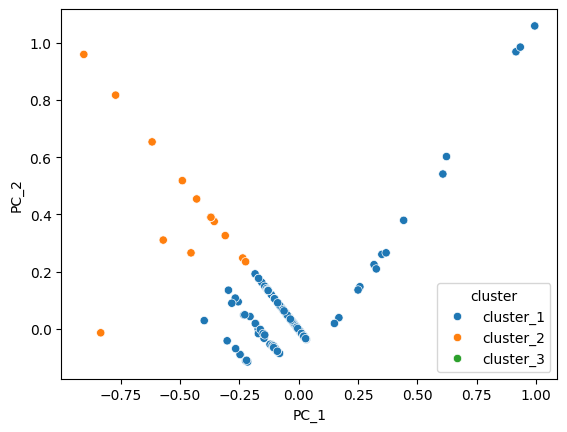

In [81]:
sns.scatterplot(x=d['PC_1'], 
                y=d['PC_2'], 
                data=d, 
                hue='cluster', hue_order = ['cluster_1', 'cluster_2', 'cluster_3'],  sizes=(100))
plt.show()

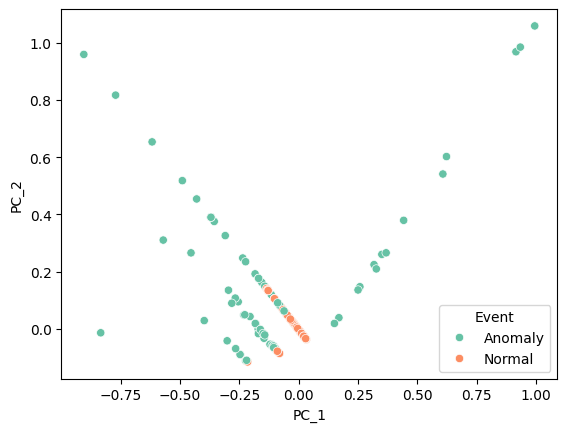

In [83]:
sns.scatterplot(x=d['PC_1'], 
                y=d['PC_2'], 
                data=d, 
                hue='Event', hue_order = ['Anomaly', 'Normal'],  sizes=(100), palette="Set2")
plt.show()

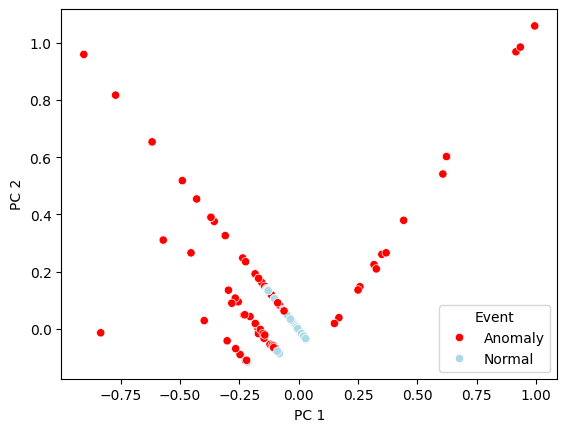

In [84]:
palette = {'Anomaly': 'red', 'Normal': 'lightblue'}

# Criando o gráfico de dispersão
sns.scatterplot(
    x=d['PC_1'], 
    y=d['PC_2'], 
    data=d, 
    hue='Event', 
    hue_order=['Anomaly', 'Normal'], 
    sizes=(100), 
    palette=palette
)

# plt.title("Gráfico de Dispersão com Cores Personalizadas")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title='Event')
plt.show()

Gráfico com 3 componentes principais

In [85]:
pca = PCA(n_components=3, random_state=43)
pca.fit(dados_p)

PCA(n_components=3, random_state=43)

In [86]:
score_pca = pca.fit_transform(dados_p)
column_names = ["PC_1", "PC_2", "PC_3"]
score_pca = pd.DataFrame(score_pca, columns=column_names)
score_pca

PC_1      PC_2      PC_3
0    0.257926  0.147285 -0.106443
1    0.031660 -0.036402 -0.006606
2   -0.833457 -0.013737  0.953590
3    0.028863 -0.033428 -0.007640
4    0.026855 -0.031293 -0.008382
..        ...       ...       ...
776  0.029532 -0.034139 -0.007392
777  0.020967 -0.025030 -0.010559
778  0.021663 -0.025770 -0.010302
779  0.368364  0.265835 -0.085499
780  0.029532 -0.034139 -0.007392

[781 rows x 3 columns]

In [87]:
d = pd.concat([score_pca, df_dataset], axis=1)
d.head()

PC_1      PC_2      PC_3           account_number  total_sent  \
0  0.257926  0.147285 -0.106443          341-9H95-114418       26060   
1  0.031660 -0.036402 -0.006606       341.0-646.0-745232           0   
2 -0.833457 -0.013737  0.953590      341.0-9295.0-183835           0   
3  0.028863 -0.033428 -0.007640  104.0-2448.0-3000008512           0   
4  0.026855 -0.031293 -0.008382  237.0-2628.0-0107100078           0   

   total_received  num_transactions_sent  num_transactions_received  \
0               0                     19                          0   
1              41                      0                          1   
2           30028                      0                          6   
3             250                      0                          1   
4             400                      0                          1   

   average_value_sent  average_value_received  std_dev_sent  std_dev_received  \
0         1371.578947                0.000000   1846.961867          0.000000   
1            0.000000               41.000000      0.000000          0.000000   
2            0.000000             5004.666667      0.000000       4723.322971   
3            0.000000              250.000000      0.000000          0.000000   
4            0.000000              400.000000      0.000000          0.000000   

   outdegree  indegree  variation_rate  is_anomalous  score_anomalous  \
0         19         0             0.0             1         0.093302   
1          0         1             0.0             0         0.000099   
2          0         6             0.0             1         0.705357   
3          0         1             0.0             0         0.000000   
4          0         1             0.0             0         0.000000   

     Event    cluster  
0  Anomaly  cluster_1  
1   Normal  cluster_1  
2  Anomaly  cluster_2  
3   Normal  cluster_1  
4   Normal  cluster_1

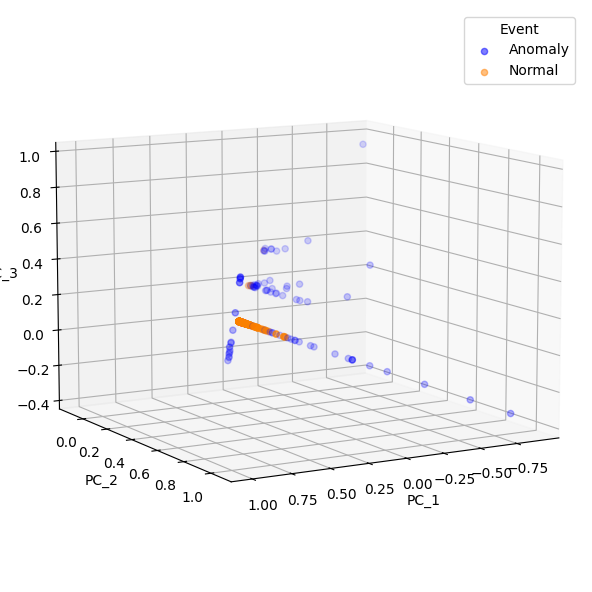

In [88]:
palette = {'Anomaly': (0, 0, 1, 0.5),    
           'Normal': (1, 0.5, 0, 0.5)}    

colors = [palette[c] for c in d.Event]


# Criar figura e eixos 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico 3D com scatter
sc = ax.scatter(d.PC_1, d.PC_2, d.PC_3, c=colors)



for Event, color in palette.items():
    ax.scatter([], [], [], c=[color], label=Event)

# Configurar rótulos dos eixos
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

# Exibir a legenda
ax.legend(title='Event')

ax.view_init(elev=10, azim=60) 
plt.tight_layout(pad=1)
# Exibir o gráfico
plt.show()

### Agrupamento Hierárquico 

In [89]:
df_dataset.head()

account_number  total_sent  total_received  num_transactions_sent  \
0          341-9H95-114418       26060               0                     19   
1       341.0-646.0-745232           0              41                      0   
2      341.0-9295.0-183835           0           30028                      0   
3  104.0-2448.0-3000008512           0             250                      0   
4  237.0-2628.0-0107100078           0             400                      0   

   num_transactions_received  average_value_sent  average_value_received  \
0                          0         1371.578947                0.000000   
1                          1            0.000000               41.000000   
2                          6            0.000000             5004.666667   
3                          1            0.000000              250.000000   
4                          1            0.000000              400.000000   

   std_dev_sent  std_dev_received  outdegree  indegree  variation_rate  \
0   1846.961867          0.000000         19         0             0.0   
1      0.000000          0.000000          0         1             0.0   
2      0.000000       4723.322971          0         6             0.0   
3      0.000000          0.000000          0         1             0.0   
4      0.000000          0.000000          0         1             0.0   

   is_anomalous  score_anomalous    Event    cluster  
0             1         0.093302  Anomaly  cluster_1  
1             0         0.000099   Normal  cluster_1  
2             1         0.705357  Anomaly  cluster_2  
3             0         0.000000   Normal  cluster_1  
4             0         0.000000   Normal  cluster_1

In [90]:
X = df_dataset.drop(['account_number', 'Event', 'cluster', 'is_anomalous'], axis=1) #'is_anomalous'

# Padronizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

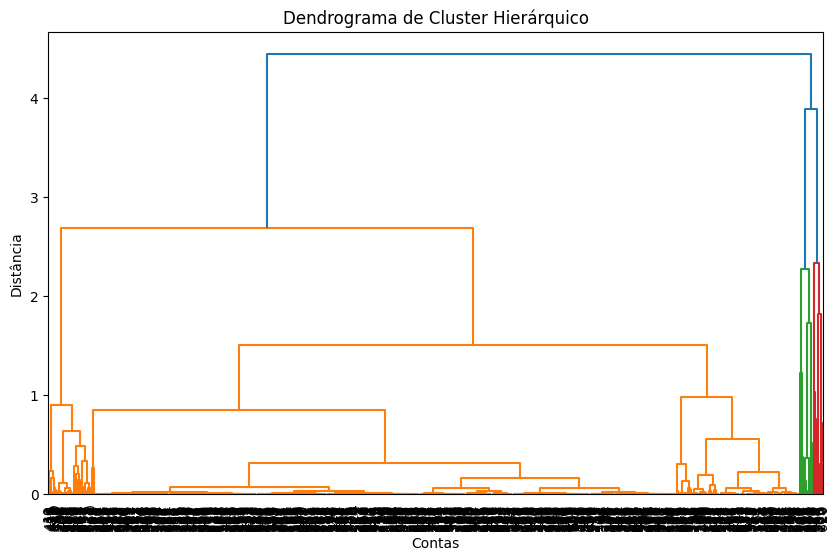

In [91]:
# Realizar o agrupamento hierárquico
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Cluster Hierárquico')
plt.xlabel('Contas')
plt.ylabel('Distância')
plt.show()

In [75]:
# os investigados 1 e 4 tem padrões de transações financeiras semelhantes